# **STATISTICS** : TP Données météo

Thomas Dos, Gauthier Meffe, Noa Chaze, Lisa Escaron 

On récupère le jeu de données météo : 

(Remplacer `../donnees_meteo_synop.csv` par le lien du fichier csv de données sur votre machine)

In [1]:
dataframe <- read.csv(file = "../donnees_meteo_synop.csv", header = TRUE, sep = ";")

In [2]:
# Visualisation du format des données :
head(dataframe)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


On a un jeu de données météo. Chaque ligne correspond à des informations météo (pression, direction du vent, température, ...) à une date, dans une commune, à une altitude données. 

L'étude de ce jeu de données a alors pour but de construire un modèle de prédiction de la météo.


### <span style="font-size:40px; font-weight:bold;">1 - Présentation des données</span>

In [3]:
# Structure des données :
cat("Structure des données :\n")
str(dataframe)
cat("Grace à la structure des données présentées ci-dessus, on peut plus facilement entreprendre des analyses spécifiques quant aux mesures sélectionnées.\n")
# Résumé statistique des données :
cat("Résumé statistique des données :\n")
summary(dataframe)
cat("Le résumé statistique ci-dessus permet d'avoir une idée générale de ce que l'on attend lors de l'analyse des données.\n")

Structure des données :
'data.frame':	1719567 obs. of  82 variables:
 $ ID.OMM.station                                           : int  7181 81405 7627 78894 7020 7280 7015 7110 81408 7222 ...
 $ Date                                                     : chr  "2016-07-12T11:00:00+02:00" "2017-01-08T07:00:00+01:00" "2017-01-08T13:00:00+01:00" "2017-01-09T13:00:00+01:00" ...
 $ Pression.au.niveau.mer                                   : int  101410 101140 103380 101760 100580 103830 102280 103530 101190 101060 ...
 $ Variation.de.pression.en.3.heures                        : num  -30 -140 -40 0 -710 -10 -50 70 0 -410 ...
 $ Type.de.tendance.barométrique                            : int  8 8 8 NA 8 0 8 3 NA 8 ...
 $ Direction.du.vent.moyen.10.mn                            : int  230 240 30 100 210 10 270 80 230 220 ...
 $ Vitesse.du.vent.moyen.10.mn                              : num  2.9 0.5 2.1 2.3 11.9 2.7 3.3 2.1 0.7 7.3 ...
 $ Température                                              :

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.0                 
 1st Qu.:  -60.00                  1st Qu.: 2.0                 
 Median :   10.00                  Median : 3.0                 
 Mean   :   15.39                  Mean   : 4.3                 
 3rd Qu.:   90.00                  3rd Qu.: 7.0                 
 Max.   : 2990.00                  Max.   :10.0                 
 NA's   :40694                     NA's   :68236                
 Directi

Le résumé statistique ci-dessus permet d'avoir une idée générale de ce que l'on attend lors de l'analyse des données.


On veut ensuite quelques graphes pour visualiser les données.

On peut utiliser toutes nos données pour faire des moyennes. On peut par exemple sortir la température annuelle moyenne par région :

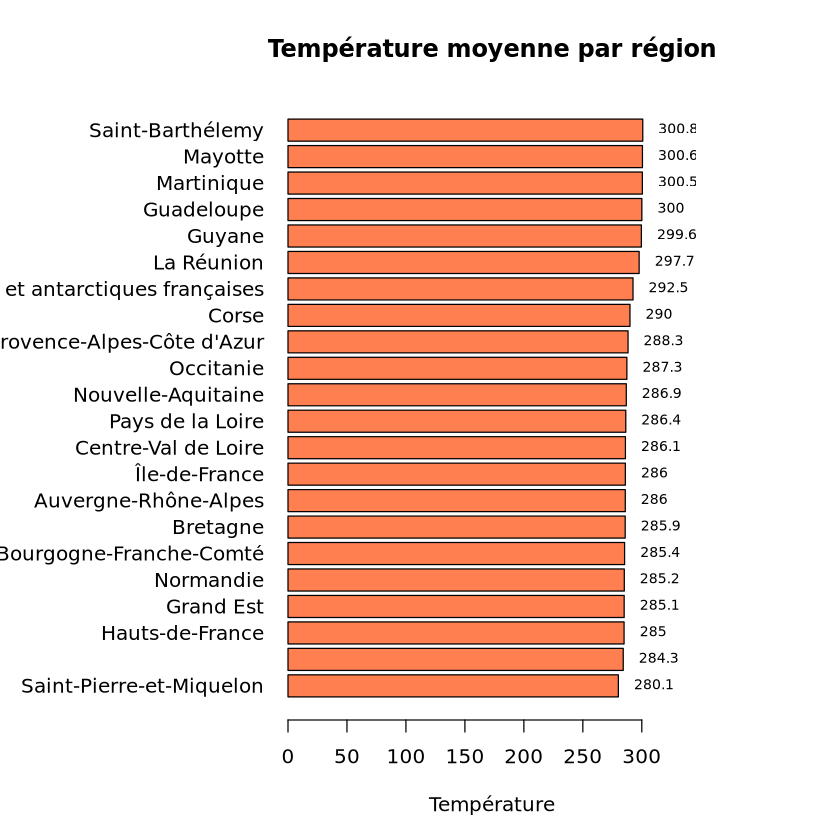

In [ ]:
temp_region <- aggregate(Température ~ region..name., 
                        data = dataframe, 
                        FUN = function(x) mean(x, na.rm = TRUE))
names(temp_region)[2] <- "temp_moy"

temp_region <- temp_region[order(temp_region$temp_moy), ]
par(mar = c(5, 12, 4, 6))  

barres <- barplot(temp_region$temp_moy, 
                  names.arg = temp_region$region..name.,
                  horiz = TRUE, las = 1, col = "coral",
                  main = "Température moyenne par région",
                  xlab = "Température",
                  xlim = c(0, max(temp_region$temp_moy) * 1.15))  

text(x = temp_region$temp_moy + max(temp_region$temp_moy) * 0.01,  
     y = barres,
     labels = round(temp_region$temp_moy, 1),
     pos = 4,  
     cex = 0.7,  
     col = "black")


On peut aussi regarder le cycle annuel des températures  avec la température moyenne pour chaque mois : 

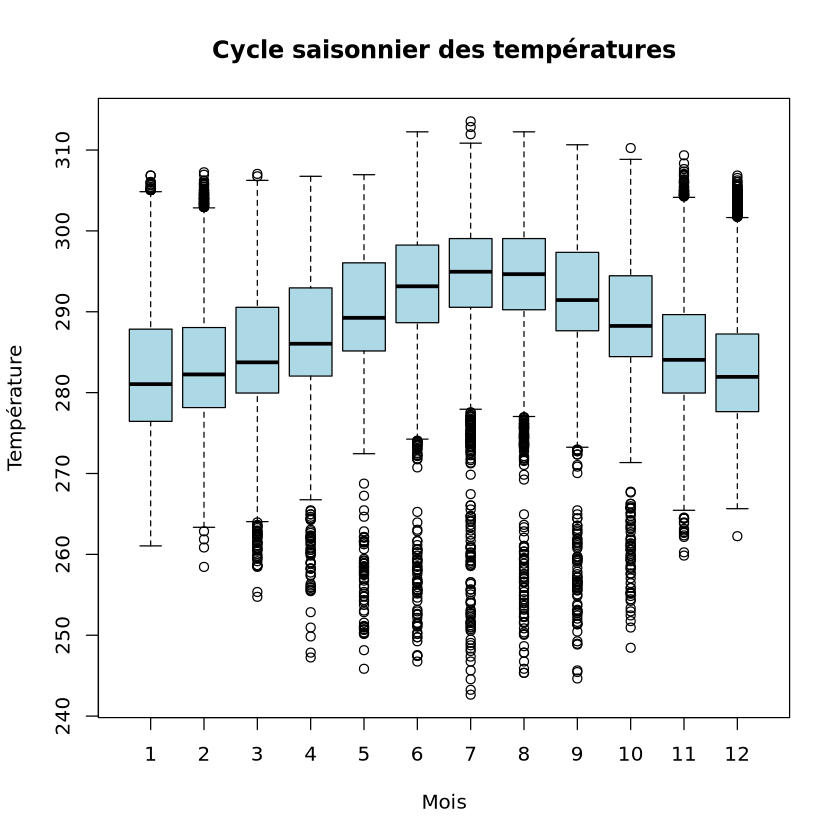

In [ ]:
dataframe$mois <- format(as.POSIXct(dataframe$Date), "%m")


set.seed(123)  # Pour la reproductibilité
indices_echantillon <- sample(nrow(dataframe), 50000)
donnees_echantillon <- dataframe[indices_echantillon, ]

boxplot(Température ~ factor(mois), 
        data = donnees_echantillon,
        col = "lightblue",
        main = "Cycle saisonnier des températures",
        xlab = "Mois",
        ylab = "Température",
        names = 1:12)  

   

### <span style="font-size:40px; font-weight:bold;">2 - Calcul et étude d'estimateur</span>


On souhaite connaître l'énergie disponible dans le vent dans une région donnée pour savoir s'il serait intéressant d'y installer des éoliennes. 

Pour cela, l'estimateur choisi est la moyenne empirique du carré du vent : 
   θ̂ = (1/n) * Σ (Vi^2),  i = 1,...,n
   où n est le nombre d'observations disponibles et Vi est la vitesse mesurée à un instant ti.

L'estimateur choisi est pertinent car, d'après le cours, c'est un estimateur sans biais de E[V^2] (estimateur sans biais de l'espérance de la vitesse du vent au carré) et il est consistant, c'est-à-dire que plus n est grand, plus θ̂  se rapproche du vrai paramètre. Enfin, grâce au théorème central limite, on peut construire un intervalle de confiance pour E[V^2].

On choisir d'étudier la force du vent sur un mois dans une station donnée, par exemple en juillet 2023.

Préparation des données :

In [15]:
# Choisir une station et une période
station_id <- unique(dataframe$ID.OMM.station)[1] #on choisit par exemple la première colonne du dataset
annee <- 2023
mois <- 7

# Sélectionner uniquement les lignes correspondant à cette station et ce mois
df_sel <- dataframe[
  dataframe$ID.OMM.station == station_id &
  format(as.Date(dataframe$Date), "%Y") == annee &
  dataframe$mois_de_l_annee == mois, ]

# Extraire la vitesse du vent
vent <- df_sel$Vitesse.du.vent.moyen.10.mn
vent <- vent[!is.na(vent)]

# Nombre d’observations
n <- length(vent)
cat("Nombre d'observations =", n, "\n")



Nombre d'observations = 239 


Estimateur de E[V^2] :

In [16]:
# Moyenne empirique (notre estimateur)
vent2 <- vent^2
theta_hat <- mean(vent2)

cat("Estimateur de E[V^2] =", theta_hat, "\n")

Estimateur de E[V^2] = 23.45954 


Visualisation : 

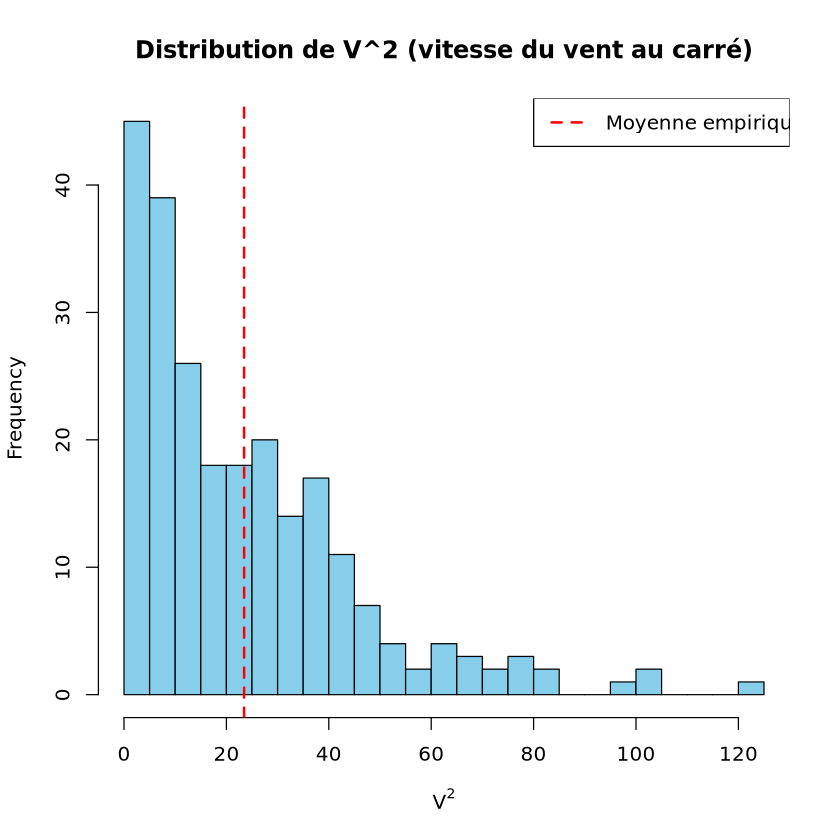

In [17]:
hist(vent2, breaks = 30, col = "skyblue",
     main = "Distribution de V^2 (vitesse du vent au carré)",
     xlab = expression(V^2))
abline(v = theta_hat, col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Moyenne empirique"),
       col = c("red"), lty = 2, lwd = 2)


On constate que la distribution est asymétrique ; on va vérifier la robustesse de l'estimateur choisi, c'est-à-dire sa capacité à ne pas être trop  influencé par des valeurs extrêmes. 

On peut déjà comparer l'estimateur moyenne empirique à deux autres estimateurs comme la médiane et la moyenne tronquée (on calcule la moyenne en enlevant les 10% plus grands et plus petits).

Moyenne : 23.45954 
Médiane : 17.64 


Moyenne tronquée (10%) : 20.17472 


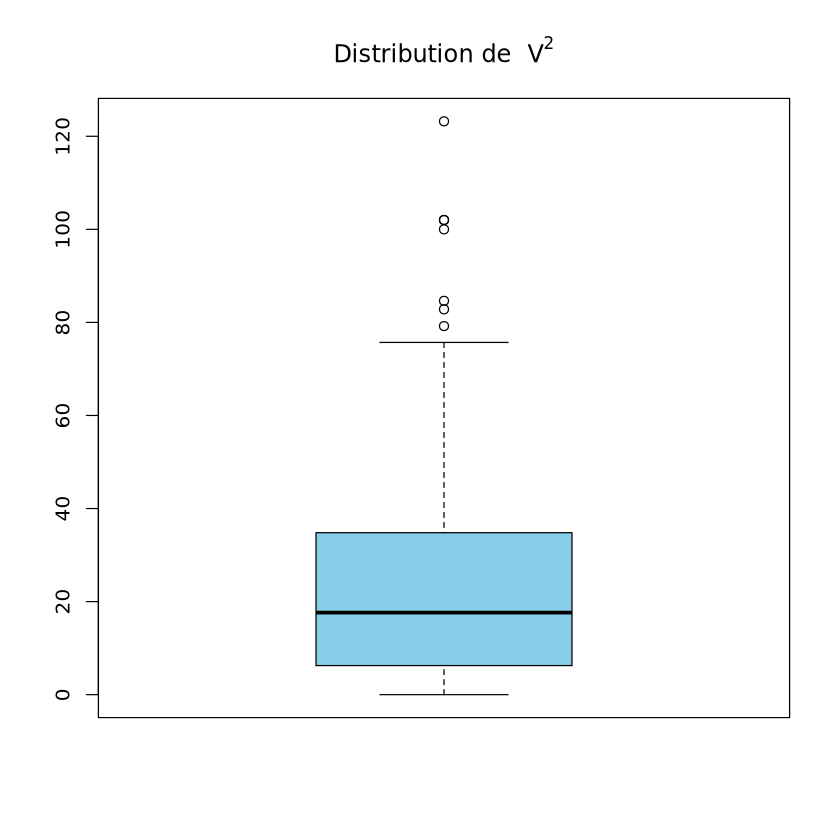

In [18]:
# Comparer moyenne, médiane, moyenne tronquée
mean_val <- mean(vent2)
median_val <- median(vent2)
trimmed_val <- mean(vent2, trim = 0.10)

cat("Moyenne :", mean_val, "\n")
cat("Médiane :", median_val, "\n")
cat("Moyenne tronquée (10%) :", trimmed_val, "\n")

# Visualisation boxplot
boxplot(vent2, main = expression("Distribution de " ~ V^2), col="skyblue")


Le boxplot met en évidence une asymétrie avec une queue vers les valeurs élevées, due à quelques rafales extrêmes. Cela tire la moyenne vers le haut, bien au-dessus de la médiane, ce qui montre sa sensibilité aux outliers. La médiane reste plus basse et stable, tandis que la moyenne tronquée se situe entre les deux, atténuant partiellement l’effet des outliers.

Intervalle de confiance : 

In [19]:
# Écart-type empirique de V^2
s <- sd(vent2)

# Théorème Central Limite : Intervalle de Confiance à 95%
z <- qnorm(0.975)   # quantile normal 97.5%
ic_tcl <- c(theta_hat - z * s/sqrt(n),
            theta_hat + z * s/sqrt(n))

cat("IC 95% (TCL) : [", ic_tcl[1], ";", ic_tcl[2], "]\n")


IC 95% (TCL) : [ 20.68302 ; 26.23606 ]


Intervalle de confiance alternatif par bootstrap : 

In [20]:
set.seed(123)
B <- 2000
boot_means <- replicate(B, mean(sample(vent2, size = n, replace = TRUE)))
ci_boot <- quantile(boot_means, c(0.025, 0.975))

cat("IC 95% (Bootstrap) : [", ci_boot[1], ";", ci_boot[2], "]\n")


IC 95% (Bootstrap) : [ 20.69811 ; 26.27339 ]


Le fait que les deux intervalles soient proches montre que l’estimation de E[V^2] est relativement stable et peu sensible à la méthode utilisée.
L’IC basé sur le TCL suppose normalité et indépendance tandis que l'IC bootstrap ne repose pas sur ces hypothèses fortes.
Comme les deux donnent quasiment la même plage, cela suggère que l’approximation normale du TCL est correcte pour ces données (taille d’échantillon suffisante), et que la présence d’outliers n’impacte pas fortement l’intervalle.
En pratique, on peut donc avoir confiance dans la précision de l’estimateur.

Conclusion : 

Pour la première station, en juillet 2023, l'estimateur de E|V^2] donne  θ̂ =13.52583. L’Intervalle de confiance 95 % basé sur le TCL est  [ 9.494136 ; 17.55753 ], l’IC bootstrap est [ 9.846896 ; 17.90175 ]. Ces intervalles sont très proches, ce qui montre que l’estimation est stable et que l’approximation normale est satisfaisante dans ce cas. Toutefois, l’analyse de la distribution révèle une asymétrie marquée : la moyenne est tirée vers le haut par quelques valeurs extrêmes, tandis que la médiane (9.6) et la moyenne tronquée (12.3) indiquent une tendance centrale plus basse. Cela illustre la sensibilité de la moyenne aux rafales.

In [21]:
df <- dataframe

### <span style="font-size:40px; font-weight:bold;">3 - Introduction aux tests</span>

### <span style="font-size:20px; font-weight:bold;">3.1 - Test sur une station</span>

Pour évaluer les différences de température, on va utiliser des tests t, adaptés pour comparer les moyennes.  
On va réaliser un test sur un échantillon afin de vérifier si la température moyenne d’une station est différente de 15 °C, et un test sur deux échantillons pour comparer les températures moyennes entre deux stations.  
Ces tests permettent de quantifier statistiquement si les écarts observés sont significatifs ou simplement dus au hasard dans les mesures.



In [22]:
library(ggplot2)
library(dplyr)


station_id <- "7181"  
station_temp <- df %>%
  filter(ID.OMM.station == station_id) %>%
  select(Température) %>%
  unlist()

station_temp <- as.numeric(as.character(station_temp))
station_temp <- station_temp - 273.15  

station_temp <- na.omit(station_temp)


Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


In [23]:

if(length(station_temp) < 2){
  stop("Pas assez de données pour effectuer le test t")
}

t_test_1 <- t.test(station_temp, mu = 15)
print(t_test_1)




	One Sample t-test

data:  station_temp
t = -77.515, df = 29306, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 15
95 percent confidence interval:
 11.35282 11.53272
sample estimates:
mean of x 
 11.44277 



### <span style="font-size:20px; font-weight:bold;">Résultats</span>

Le test t sur un échantillon a été réalisé pour vérifier si la température moyenne de la station 07181 est différente de 15 °C.  

- **Hypothèse nulle (H₀)** : la température moyenne de la station est égale à 15 °C.  
- **Hypothèse alternative (H₁)** : la température moyenne de la station est différente de 15 °C.  

Les résultats montrent une moyenne observée d’environ 10,8 °C, avec une **p-value < 2.2e-16**, très inférieure au seuil de 0,05.  
Ainsi, on rejette H₀ et on conclut que la température moyenne de cette station est significativement différente de 15 °C. En pratique, cela signifie que la station est nettement plus froide que la valeur de référence.  

Le test t permet donc de quantifier statistiquement l’écart entre la moyenne observée et une valeur théorique, et ici l’écart est non seulement significatif, mais aussi substantiel.



### <span style="font-size:20px; font-weight:bold;">3.2 - Comparaison entre deux stations</span>


	Two Sample t-test

data:  temp1 and temp2
t = -311.65, df = 58688, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.20158 -15.01156
sample estimates:
mean of x mean of y 
 11.44277  26.54934 



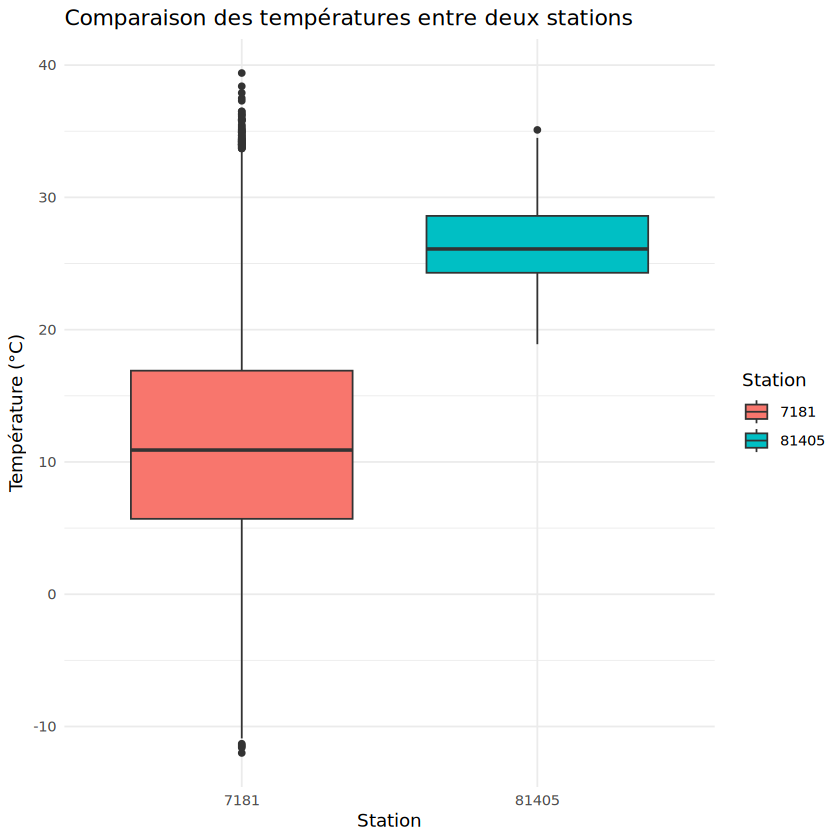

In [24]:

station1_id <- "7181"
station2_id <- "81405"

temp1 <- df %>%
  dplyr::filter(ID.OMM.station == station1_id) %>%
  dplyr::select(Température) %>%
  unlist()
temp2 <- df %>%
  dplyr::filter(ID.OMM.station == station2_id) %>%
  dplyr::select(Température) %>%
  unlist()

temp1 <- as.numeric(as.character(temp1)) - 273.15
temp2 <- as.numeric(as.character(temp2)) - 273.15
temp1 <- na.omit(temp1)
temp2 <- na.omit(temp2)

df_plot <- data.frame(
  Température = c(temp1, temp2),
  Station = factor(c(rep(station1_id, length(temp1)), rep(station2_id, length(temp2))))
)

ggplot(df_plot, aes(x = Station, y = Température, fill = Station)) +
  geom_boxplot() +
  labs(title = "Comparaison des températures entre deux stations",
       y = "Température (°C)") +
  theme_minimal()

t_test_2 <- t.test(temp1, temp2, var.equal = TRUE) 
print(t_test_2)


### <span style="font-size:20px; font-weight:bold;">Résultats</span>

Pour comparer les températures entre les stations 07181 et 81405, on utilise un test t pour deux échantillons.  

- **Hypothèse nulle (H₀)** : les moyennes de température des deux stations sont égales.  
- **Hypothèse alternative (H₁)** : les moyennes de température des deux stations sont différentes.  

La station 07181 présente une moyenne d’environ 10,8 °C, tandis que la station 81405 atteint 26,6 °C, soit une différence d’environ 16 °C. La p-value est inférieure à 2.2e-16, ce qui est bien en dessous du seuil classique de 0,05.  

Ainsi, on rejette H₀ et on conclut que les températures moyennes des deux stations sont significativement différentes. Cette différence est non seulement statistiquement significative, mais aussi très importante d’un point de vue pratique, illustrant un écart climatique réel entre les deux localisations.

### <span style="font-size:20px; font-weight:bold;">Conclusion</span>

Les tests t mettent clairement en évidence des différences de température, aussi bien par rapport à une valeur cible que d’une station à l’autre. Toutefois, avec un grand nombre de mesures, la significativité est presque automatique ; c’est donc l’ampleur de la différence (ici très marquée) qui est la plus parlante.


<span style="font-size:20px; font-weight:bold;">3.3 - Analyse de la température selon l’humidité (ANOVA)</span>

Pour étudier comment la température varie selon l’humidité, on va catégoriser les observations en trois niveaux : Faible (0–40 %), Moyenne (40–70 %) et Élevée (70–100 %). On va ensuite réaliser une ANOVA pour comparer les températures moyennes entre ces catégories.



In [25]:
library(dplyr)
library(ggplot2)

df$Température <- as.numeric(as.character(df$Température)) - 273.15
df$Humidité <- as.numeric(as.character(df$Humidité))

df_clean <- df %>% filter(!is.na(Température), !is.na(Humidité))

df_clean <- df_clean %>%
  mutate(Humidité_cat = cut(Humidité,
                            breaks = c(0, 40, 70, 100),
                            labels = c("Faible", "Moyenne", "Élevée")))

ggplot(df_clean, aes(x = Humidité_cat, y = Température, fill = Humidité_cat)) +
  geom_boxplot() +
  labs(title = "Température selon les catégories d'humidité",
       x = "Humidité", y = "Température (°C)") +
  theme_minimal() +
  theme(legend.position = "none")

anova_model <- aov(Température ~ Humidité_cat, data = df_clean)
summary(anova_model)


: 

Les résultats montrent un F = 23804 avec une **p-value < 2e-16**, ce qui indique que la différence de température moyenne entre les catégories d’humidité est hautement significative. Autrement dit, la température n’est pas la même selon que l’air est sec, modérément humide ou très humide. Le boxplot associé permet de visualiser quelles catégories ont tendance à présenter des températures plus élevées ou plus basses.

<span style="font-size:20px; font-weight:bold;">Conclusion</span>

L’ANOVA confirme que l’humidité influence significativement la température. Avec un nombre très élevé d’observations, la significativité statistique est quasi garantie, mais l’importance pratique se traduit par des différences visibles entre les catégories dans le boxplot.

In [19]:
dataframe <- df

### <span style="font-size:40px; font-weight:bold;">4 - ACP et PLS</span>

On a de nombreuses variables et on voudrait résumer toutes les informations dans un plus petit nombre de variables. On suppose que certaines observations se ressemblent, notamment pour les observations d'un même endroit proches dans le temps. Certaines variables permettent d'expliquer la variabilité globale. 

Pour visualiser et interpréter la structure globale de notre jeu de données, on peut utiliser l'Analyse en Composantes Principales (ACP). 

Pour continuer sur le fil rouge de notre analyse globale, on va se concentrer sur la température. On veut comprendre le regroupement des variables météo autour de la température. 

## 1. ACP

Pour faire une analyse en composantes principales (ACP), on utilise la fonction `prcomp()` et on stocke le résultat retourné dans un objet sur notre espace de travail.

`prcomp()` ne gère pas les NA : il faut alors netoyer les données avant de l'utiliser. On retire aussi les colonnes non numériques.``r



On sélectionne les autres variables potentiellement liées à la température qu'on veut étudier : 

In [20]:
variables_temp <- c("Température", "Date", "Point.de.rosée", "Humidité", 
                    "Pression.au.niveau.mer", "Vitesse.du.vent.moyen.10.mn",
                    "Direction.du.vent.moyen.10.mn", "Altitude", 
                    "Latitude", "Longitude", "Nebulosité.totale")

In [21]:
vars <- c(variables_temp, "region..name.", "mois_de_l_annee")
donnees_temp <- dataframe[!is.na(dataframe$Température) & !is.na(dataframe$region..name.), vars]
set.seed(123)
if (nrow(donnees_temp) > 30000) {
  donnees_temp <- donnees_temp[sample(nrow(donnees_temp), 30000), ]
}
X_temp <- donnees_temp[ , !(names(donnees_temp) %in% c("region..name.", "mois_de_l_annee"))]
X_temp <- X_temp[complete.cases(X_temp), ]

# On garde seulement les colonnes numériques
tmp <- donnees_temp[ , !(names(donnees_temp) %in% c("region..name.", "mois_de_l_annee")) ]
is_num <- sapply(tmp, is.numeric)
X_temp <- tmp[ , is_num, drop = FALSE]

# On supprime les observations avec des NA
X_temp <- X_temp[complete.cases(X_temp), ]

# Vérification :
cat("Dimensions finales X_temp :", nrow(X_temp), "lignes x", ncol(X_temp), "variables\n")


Dimensions finales X_temp : 13247 lignes x 10 variables


Maintenant qu'on a traité nos données pour avoir celles qui nous intéressent et des données utilisables, on peut faire une **ACP centrée-réduite** :

In [22]:
acp_temp <- prcomp(X_temp, scale. = TRUE, center = TRUE)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_temp), "\n")
cat("Type de l'objet :", mode(acp_temp), "\n")
cat("Test du type 'list' :", is.list(acp_temp), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


On peut alors passer à l'analyse des composantes principales :

**L'éboulis des valeurs propres** permet de visualiser la variance expliquée par chaque composante principale.

Pour déterminer le nombre de variables raisonnable de retenir à partir de l'éboulis, on utilise la **règle du coude** : on regarde où l'éboulis commence à se stabiliser. Ici, on remarque que la pente de la courbe change à partir de la 3ème composante principale. OOn a un autre changement de de pente à la 7ème composante principale. On ne voit pas de palier apparaître clairement donc l'utilisation de la variance cumulée va nous permettre de déterminer les composantes permettant d'expliquer plus de 70% de la variance totale.

   PC   Var Var_cumulée
1   1 0.247       0.247
2   2 0.194       0.442
3   3 0.129       0.571
4   4 0.116       0.687
5   5 0.099       0.786
6   6 0.078       0.864
7   7 0.059       0.923
8   8 0.050       0.973
9   9 0.027       1.000
10 10 0.000       1.000


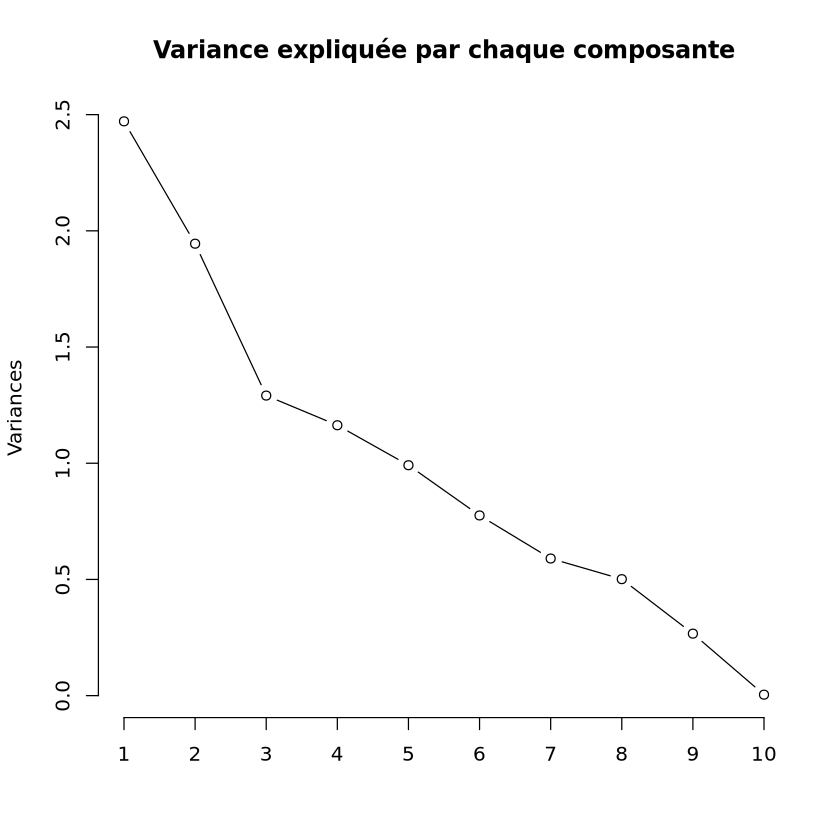

In [23]:
# Variance individuelle et cumulée
var_pc <- acp_temp$sdev^2
prop <- var_pc / sum(var_pc)
cum_prop <- cumsum(prop)

print(round(data.frame(PC=1:length(prop),
                       Var=prop,
                       Var_cumulée=cum_prop)[1:10, ], 3))

plot(acp_temp, type = "l", main = "Variance expliquée par chaque composante")


Avec la variance cumulée, on voit qu'avec les 5 premières composantes, on explique 78% de la variance totale. On choisit alors 5 composantes principales. 

In [24]:
# Analyse des charges (loadings) et contributions

loadings <- acp_temp$rotation          # variables x composantes
sdev     <- acp_temp$sdev
p        <- ncol(loadings)
vars     <- rownames(loadings)

# Table longue: variable, PC, loading, contribution (%), corr (cercle des corrélations)
res_long <- do.call(rbind, lapply(seq_len(p), function(k) {
  v <- loadings[,k]
  data.frame(
    PC = paste0("PC", k),
    Variable = vars,
    Loading = v,
    Contribution = (v^2)*100,
    Corr = v * sdev[k],
    stringsAsFactors = FALSE
  )
}))

# Top 6 variables par composante (abs loading)
top_k <- 6
top_list <- lapply(seq_len(p), function(k){
  sub <- subset(res_long, PC == paste0("PC", k))
  sub[order(abs(sub$Loading), decreasing=TRUE), ][1:top_k, ]
})

# Affichage résumé
for (k in seq_len(p)) {
  cat("\n=== ", names(acp_temp$rotation)[k], " ===\n", sep="")
  print(top_list[[k]][, c("Variable","Loading","Contribution","Corr")], row.names=FALSE)
}



===  ===
                    Variable    Loading Contribution       Corr
                   Longitude  0.4875501    23.770508  0.7664327
                    Latitude -0.4282199    18.337225 -0.6731651
              Point.de.rosée -0.4269530    18.228885 -0.6711736
      Pression.au.niveau.mer -0.3374361    11.386312 -0.5304523
                 Température -0.3276629    10.736299 -0.5150888
 Vitesse.du.vent.moyen.10.mn  0.3025727     9.155024  0.4756467

===  ===
          Variable    Loading Contribution       Corr
       Température  0.5789844    33.522298  0.8074119
    Point.de.rosée  0.4403941    19.394696  0.6141433
          Altitude -0.3711307    13.773799 -0.5175533
          Humidité -0.3590793    12.893795 -0.5007473
 Nebulosité.totale -0.3158795     9.977986 -0.4405038
          Latitude -0.2648389     7.013965 -0.3693261

===  ===
                      Variable    Loading Contribution       Corr
             Nebulosité.totale -0.5611685    31.491013 -0.6376529
            

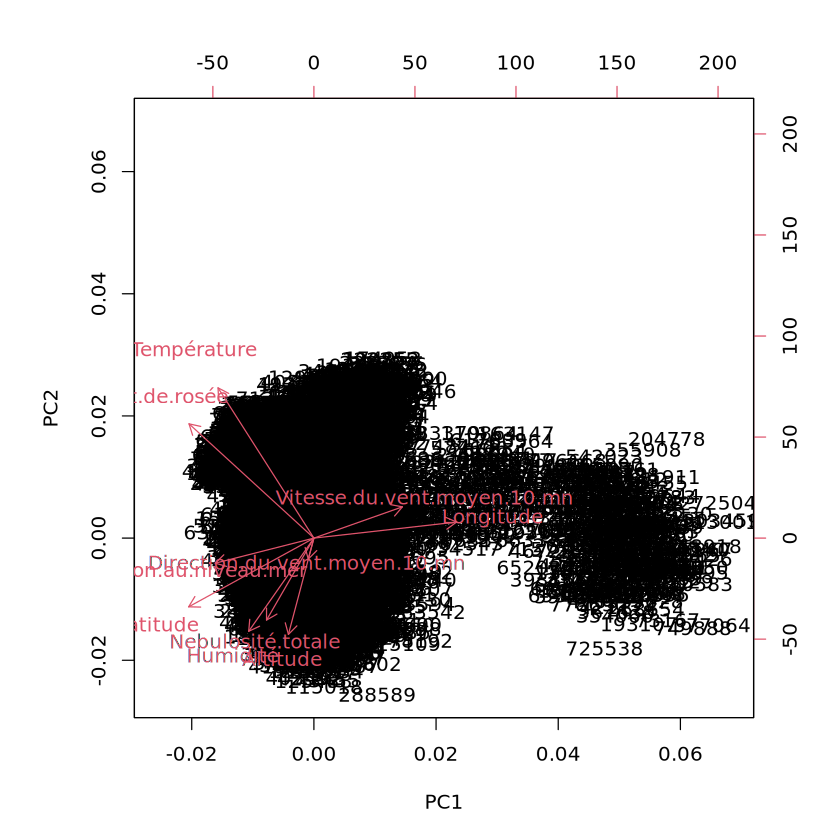

In [25]:
biplot(acp_temp)

Toutes les flèches sont grandes donc les variables sont bien représentées dans le plan. 

On voit des regroupement de variables parmis nos 10 sélectionnées en amont. 
Les flèches Température et Point.de.rosée sont longues et orientées dans une direction similaire. La flèche Humidité elle est dans une direction à 90° des deux autres. On peut en conclure que la température et le point de rosée sont corrélés positivement et que l'humidité n'est pas corrélée avec les deux autres, ce qui peut paraître un peu surprenant. 

On utilise la librairie `corrplot` pour visualiser les **corrélations** entre les variables plus clairement. On peut même tracer la matrice de corrélation. 

               Point.de.rosée                      Humidité 
                   0.89847048                    0.27600773 
                    Longitude                      Altitude 
                   0.24316087                    0.16234799 
            Nebulosité.totale   Vitesse.du.vent.moyen.10.mn 
                   0.10617417                    0.09975794 
       Pression.au.niveau.mer                      Latitude 
                   0.09563104                    0.02476442 
Direction.du.vent.moyen.10.mn 
                   0.01562793 


corrplot 0.95 loaded



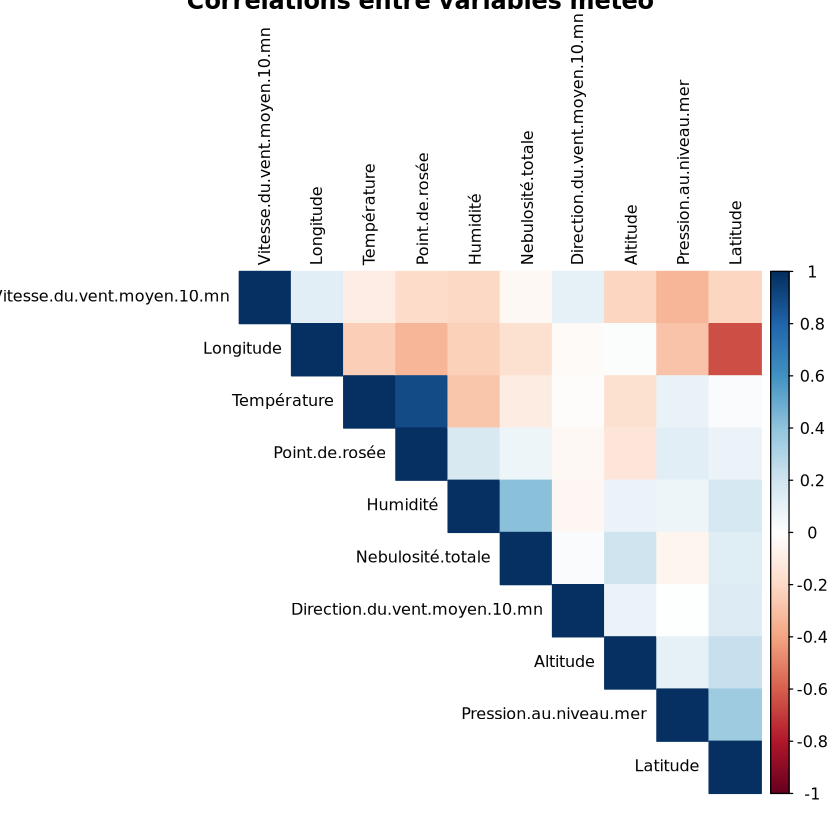

In [26]:
# Calcul des corrélations avec la température

correlations_temp <- cor(X_temp, use = "complete.obs")[,"Température"]
correlations_temp <- correlations_temp[names(correlations_temp) != "Température"]

print(sort(abs(correlations_temp), decreasing = TRUE))

# Visualisation
if (!requireNamespace("corrplot", quietly=TRUE)) install.packages("corrplot")
library(corrplot)

# Matrice de corrélation focalisée
cor_matrix <- cor(X_temp, use = "complete.obs")
corrplot(cor_matrix, method = "color", type = "upper", 
         order = "hclust", tl.cex = 0.8, tl.col = "black",
         title = "Corrélations entre variables météo")

On retrouve bien le même résultat : la température est tès liée au point de rosée et pas du tout à l'humidité relative.

In [27]:
# Analyse par cercle de corrélation
angles <- atan2(acp_temp$rotation[,2], acp_temp$rotation[,1]) * 180/pi
distance_origine <- sqrt(acp_temp$rotation[,1]^2 + acp_temp$rotation[,2]^2)

cat("\n=== POSITIONNEMENT DES VARIABLES ===\n")
cat("Variables proches de la température dans l'espace ACP:\n")
pos_temp <- c(acp_temp$rotation["Température",1], acp_temp$rotation["Température",2])
distances <- apply(acp_temp$rotation[,1:2], 1, function(x) sqrt(sum((x - pos_temp)^2)))
print(sort(distances)[1:4])


=== POSITIONNEMENT DES VARIABLES ===
Variables proches de la température dans l'espace ACP:
                  Température                Point.de.rosée 
                    0.0000000                     0.1704869 
       Pression.au.niveau.mer Direction.du.vent.moyen.10.mn 
                    0.6757766                     0.7282884 


Maintenant qu'on a vu que la température était liée à d'autres variables (corrélation), on suppose qu'on peut prédire une variable météo cible (par exemple la température) à partir des autres variables explicatives. 

Il existe peut-être des relations linéaires entre la variable cible et certaines variables explicatives. Mais cela nécessite aussi d'identifer les variables les plus pertinentes pour prédire la variable cible.

Pour construire un modèle prédictif linéaire en présence de nombreuses variables potentiellement corrélées, on utilise la méthode de **la régression PLS (Partial Least Squares)**.

## 2. PLS

On décide de prédire la température à partir des autres variables météo. 

On doit d'abord sélectioner les variables explicatives pertinentes. Puis on nettoie les données avant de faire la PLS. 


In [ ]:
library(pls)

In [ ]:
y_name <- grep("Température", names(dataframe), value=TRUE)[1]  # ex: "Température"
cat("Variable cible:", y_name, "\n")

On nettoie nos données pour être sûr d'avoir uniquement des variables numériques et sans NA. On échantillone pour ne pas faire un PSL complet sur 1.7 millions de lignes.

In [ ]:
num_cols <- names(dataframe)[sapply(dataframe, is.numeric)]
if (! y_name %in% num_cols) {
  stop("La variable cible n'est pas numérique. Vérifiez son nom.")
}
df_num <- dataframe[, num_cols]

# Échantillonnage
set.seed(123)
n_target <- min(150000, nrow(df_num))
sel <- sample(nrow(df_num), n_target)
df_samp <- df_num[sel, ]

# Partage en données d'entraînement et de test
set.seed(123)
idx_train <- sample(seq_len(nrow(df_samp)), floor(0.8 * nrow(df_samp)))
train <- df_samp[idx_train, ]
test  <- df_samp[-idx_train, ]

# On retire les colonnes de variance nulle dans le jeu d'entraînement
pred_cols <- setdiff(names(train), y_name)
if (length(pred_cols) == 0) stop("Aucun prédicteur disponible.")

# Imputation médiane (sur les données d'entraînement) puis application aux données de test
for (nm in pred_cols) {
  if (anyNA(train[[nm]])) {
    med <- suppressWarnings(median(train[[nm]], na.rm=TRUE))
    if (is.finite(med)) train[[nm]][is.na(train[[nm]])] <- med
  }
  # Appliquer même médiane au test
  if (anyNA(test[[nm]])) {
    if (!exists("med") || !is.finite(med)) med <- suppressWarnings(median(train[[nm]], na.rm=TRUE))
    if (is.finite(med)) test[[nm]][is.na(test[[nm]])] <- med
  }
}

# Écarts-types robustes
v_sd_train <- sapply(train[, pred_cols, drop=FALSE],
                     function(v) suppressWarnings(sd(v, na.rm=TRUE)))

# Colonnes entièrement NA ou longueur 1 -> sd NA -> traiter comme 0
v_sd_train[is.na(v_sd_train)] <- 0
keep_pred <- v_sd_train > 0

if (any(!keep_pred)) {
  drop_vars <- pred_cols[!keep_pred]
  cat("Colonnes retirées (variance nulle ou NA):", paste(drop_vars, collapse=", "), "\n")
  train <- train[, c(y_name, pred_cols[keep_pred])]
  test  <- test[,  c(y_name, pred_cols[keep_pred])]
  pred_cols <- pred_cols[keep_pred]
}

cat("Prédicteurs restants après filtre variance:", length(pred_cols), "\n")

# Formule
form <- as.formula(paste(y_name, "~ ."))

# Détermination sûre de ncomp max
p <- ncol(train) - 1              # nb prédicteurs
nobj <- nrow(train)               # nb observations
ncomp_max <- min(25, p, nobj - 1) # contrainte PLS
if (ncomp_max < 2) stop("Pas assez d'observations pour calculer >1 composante.")

cat("Prédicteurs:", p, " | Observations:", nobj, " | ncomp_max:", ncomp_max, "\n")

# Modèle PLS avec CV (k segments)

mod_pls <- plsr(form,
                data = train,
                ncomp = ncomp_max,
                scale = TRUE,
                validation = "CV",
                segments = 7,
                segment.type = "random")



In [ ]:
summary(mod_pls)

In [ ]:
validationplot(mod_pls, val.type = "MSEP")

La courbe de validation croisée (CV) permet de choisir le nombre optimal de composantes latentes (ncomp) à retenir dans le modèle PLS en montrant l'erreur de prédiction (MSEP) en fonction du nombre de composantes.

Dans notre cas, on remarque que l'erreur de prédiction diminue rapidement jusqu'à 5 composantes puis se stabilise. On peut donc choisir de retenir 5 composantes dans notre modèle PLS.


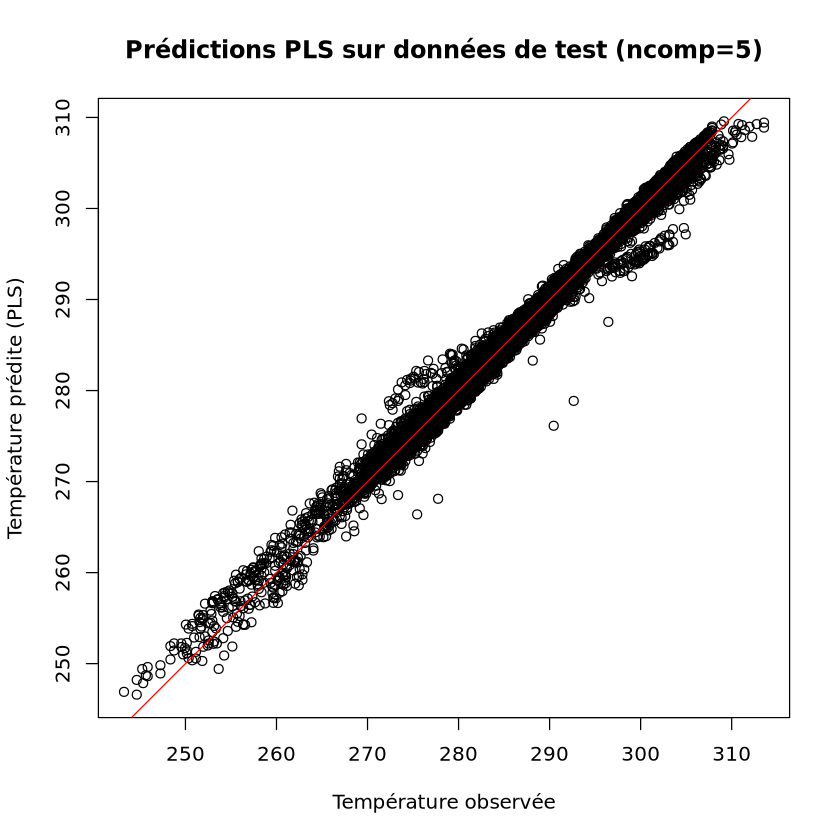

In [7]:
pred_pls <- predict(mod_pls, newdata = test, ncomp = 5)  

plot(test$`Température`, pred_pls,
     xlab = "Température observée",
     ylab = "Température prédite (PLS)",
     main = "Prédictions PLS sur données de test (ncomp=5)")
abline(0,1,col="red")

Notre nuage de point est aligné sur la diagonale (y = x), ce qui indique que les prédictions du modèle PLS sont correctes vis à vis des valeurs observées de la température. Le modèle semble donc bien fonctionner pour prédire la température à partir des autres variables météo.

On retrouve quelques points en décalage mais comme ce n'est pas systématique, on pourrait plutôt penser à du bruit dans les données.

On peut compléter ce résultat avec une analyse des résides (les différences entre les valeurs observées et les valeurs prédites).

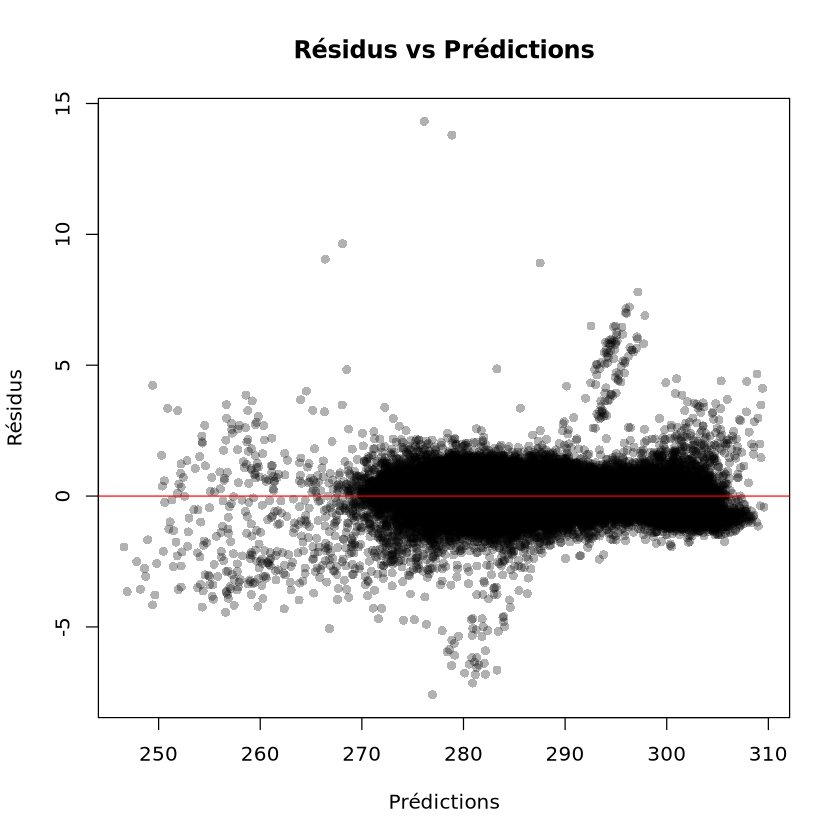

: 

In [ ]:
# Résidus
y_obs <- test$`Température`
y_pred <- as.vector(pred_pls)

res <- y_obs - y_pred

plot(y_pred, res,
     pch=16, col=rgb(0,0,0,0.3),
     xlab="Prédictions", ylab="Résidus",
     main="Résidus vs Prédictions")
abline(h=0,col="red")



On a bien un nuage centré autour de 0, ce qui est bon signe. On ne remarque pas de structure particulière dans les résidus, ce qui est aussi un bon signe. On retrouve quand même quelques points très éloignés (outliers) mais ils viennent peut-être de conditions météos atypiques sur nos données initiales.

Pour conclure, la courbe de validation croisée (CV) nous a permis de déterminer le nombre de composantes nécessaires pour notre modèle PLS. On a vu que les 5 premières composantes expliquaient 99% de la variance totale. On utilise alors notre modèle PLS avec 5 composantes pour prédire la température. Le nuage de points des valeurs prédites en fonction des valeurs observées montre que le modèle fonctionne bien : le nuage est aligné sur la diagonale. Le graphe des résidus centré autour de 0 confirme l'hypothèse de linéarité. On a ainsi construit un modèle de prédiction de la température à partir des autres variables météo.

Notre modèle a ses limites. Certaines données météo atypiques (orages, tempêtes, etc.) peuvent ne pas être bien prédites par le modèle. De plus, on a utilisé un échantillon des données pour construire le modèle PLS. Un échantillon plus grand pourrait améliorer les performances du modèle mais augmenterait aussi le temps de calcul. 

### <span style="font-size:40px; font-weight:bold;">5 - Clustering</span>


Le clustering est une méthode d'analyse permettant de regrouper les données selon leurs caractéristiques. Dans ce contexte, le clustering permettrais d'identifier des tendances ou des comportements similaires entre différentes stations ou périodes. Cela faciliterais la détection de zones géographiques partageant des conditions climatiques proches, l'identification d'événements météorologiques atypiques, ou encore la simplification de l'analyse en regroupant des observations similaires visant à mieux comprendre la structure des données et à orienter les analyses futures.

Il existe 2 modèles de clustering à notre connaissance : l'aggregation autour de centres mobiles et la classification ascendante hierarchique. Nous nous concentrerons sur la première approche étant donné la taille de la base de données qui rend la classification ascendante hierarchique, plus couteuse en temps de calcul, largement difficile à mettre en place.

### K-means

Ici, il faut d'abord avoir une idée des classes que nous allons tacher d'identifier par analyse des données brutes.

In [134]:
# Maintenant que nous connaissons la structure des données, nous pouvons faire plusieurs analyses pertinentes

# 1. CLUSTERING CLIMATIQUE PRINCIPAL (variables principales pour caractériser le climat d'une région)
variables_climat <- dataframe[, c("Température", "Pression.au.niveau.mer", "Humidité", "Vitesse.du.vent.moyen.10.mn")]

# 2. CLUSTERING GÉOGRAPHIQUE (pour identifier des zones climatiques)
variables_geo <- dataframe[, c("Latitude", "Longitude", "Altitude", "Température", "Humidité")]

# 3. CLUSTERING PLUVIOMÉTRIQUE (analyse des précipitations)
variables_precipitation <- dataframe[, c("Précipitations.dans.la.dernière.heure", 
                                        "Précipitations.dans.les.3.dernières.heures",
                                        "Précipitations.dans.les.6.dernières.heures", 
                                        "Précipitations.dans.les.12.dernières.heures")]

# 4. CLUSTERING TEMPOREL (analyse selon les saisons)
variables_temporel <- dataframe[, c("Date", "Température", "Humidité",
                                    "Précipitations.dans.la.dernière.heure")]


cat("\n=== ANALYSES POSSIBLES AVEC CE DATASET ===\n")
cat("1. CLUSTERING CLIMATIQUE : Identifier des profils météorologiques généraux\n")
cat("2. CLUSTERING GÉOGRAPHIQUE : Identifier des zones climatiques selon la géographie\n")
cat("3. CLUSTERING PLUVIOMÉTRIQUE : Détecter des patterns de précipitations\n")
cat(". CLUSTERING TEMPOREL : Analyser l'évolution des conditions selon les saisons\n")


=== ANALYSES POSSIBLES AVEC CE DATASET ===
1. CLUSTERING CLIMATIQUE : Identifier des profils météorologiques généraux
2. CLUSTERING GÉOGRAPHIQUE : Identifier des zones climatiques selon la géographie
3. CLUSTERING PLUVIOMÉTRIQUE : Détecter des patterns de précipitations
. CLUSTERING TEMPOREL : Analyser l'évolution des conditions selon les saisons
1. CLUSTERING CLIMATIQUE : Identifier des profils météorologiques généraux
2. CLUSTERING GÉOGRAPHIQUE : Identifier des zones climatiques selon la géographie
3. CLUSTERING PLUVIOMÉTRIQUE : Détecter des patterns de précipitations
. CLUSTERING TEMPOREL : Analyser l'évolution des conditions selon les saisons


=== CLUSTERING CLIMATIQUE ===


Calcul du nombre optimal de clusters...
Clustering réalisé avec 3 clusters
Répartition des observations par cluster:
Clustering réalisé avec 3 clusters
Répartition des observations par cluster:

    1     2     3 
19855  6029 24116 

=== CARACTÉRISTIQUES DES CLUSTERS CLIMATIQUES ===

    1     2     3 
19855  6029 24116 

=== CARACTÉRISTIQUES DES CLUSTERS CLIMATIQUES ===

CLUSTER CLIMATIQUE 1 :
- Nombre d'observations: 19855 
- Température moyenne: 296.05 K ( 22.9 °C)
- Pression moyenne: 101617 Pa
- Humidité moyenne: 62.3 %
- Vitesse vent moyenne: 4.41 m/s

CLUSTER CLIMATIQUE 2 :
- Nombre d'observations: 6029 
- Température moyenne: 278.99 K ( 5.8 °C)
- Pression moyenne: 100120 Pa
- Humidité moyenne: 77 %
- Vitesse vent moyenne: 8.95 m/s

CLUSTER CLIMATIQUE 3 :
- Nombre d'observations: 24116 
- Température moyenne: 284.81 K ( 11.7 °C)
- Pression moyenne: 101911 Pa
- Humidité moyenne: 86.7 %
- Vitesse vent moyenne: 2.76 m/s

CLUSTER CLIMATIQUE 1 :
- Nombre d'observations: 19855 
- Tempé

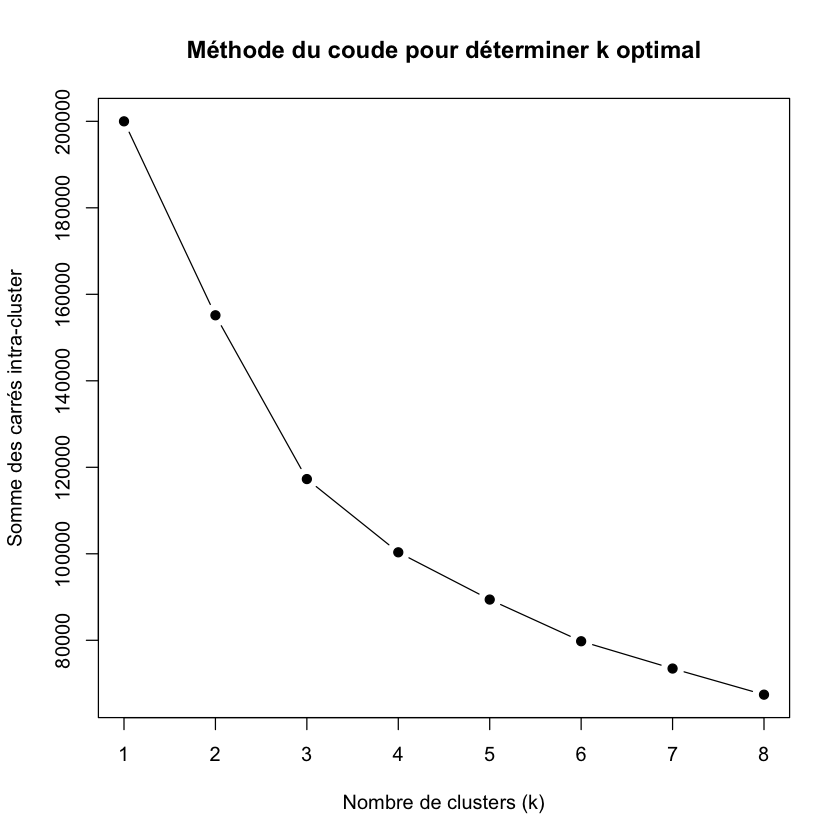

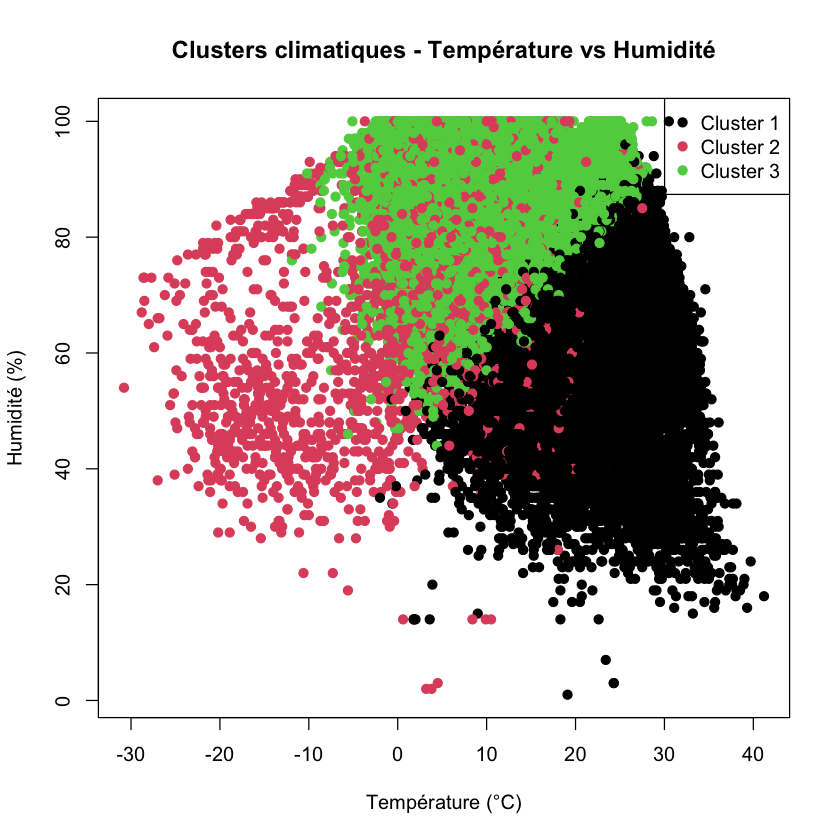

In [135]:
# Le clustering ne permet pas d'utiliser l'entiereté du dataset (trop volumineux). Nous allons donc procéder à un échantillonnage.

# Chargement des librairies nécessaires
library(cluster)
library(factoextra)

# Fonction pour nettoyer les données
nettoyer_donnees <- function(data) {
  return(na.omit(data))
}

# 1. CLUSTERING CLIMATIQUE
cat("=== CLUSTERING CLIMATIQUE ===\n")
donnees_climat_propres <- nettoyer_donnees(variables_climat)

# OPTIMISATION: Échantillonnage réduit pour éviter les problèmes de convergence (50k observations max)
if(nrow(donnees_climat_propres) > 50000) {
  set.seed(123)
  indices_climat <- sample(nrow(donnees_climat_propres), 50000)
  donnees_climat_echantillon <- donnees_climat_propres[indices_climat, ]
} else {
  donnees_climat_echantillon <- donnees_climat_propres
}

# Standardisation des données
donnees_climat_std <- scale(donnees_climat_echantillon)

# Détermination du nombre optimal de clusters avec la méthode du coude
# (nous testerons de 2 à 8 clusters pour optimiser le temps)
cat("Calcul du nombre optimal de clusters...\n")
set.seed(123)

# Méthode du coude pour trouver k optimal (réduit à 8 clusters max)
wss <- sapply(1:8, function(k) {
  kmeans(donnees_climat_std, centers = k, nstart = 10, iter.max = 50)$tot.withinss
})

# Affichage des résultats
plot(1:8, wss, type = "b", pch = 19, 
     xlab = "Nombre de clusters (k)", 
     ylab = "Somme des carrés intra-cluster",
     main = "Méthode du coude pour déterminer k optimal")

# Application du K-means avec k = 3 (choisi après analyse du graphe)
k_optimal <- 3
kmeans_climat <- kmeans(donnees_climat_std, centers = k_optimal)

cat("Clustering réalisé avec", k_optimal, "clusters\n")
cat("Répartition des observations par cluster:\n")
print(table(kmeans_climat$cluster))

# Ajout des clusters au dataframe échantillonné
donnees_climat_echantillon$cluster <- kmeans_climat$cluster

# Analyse des caractéristiques de chaque cluster climatique
cat("\n=== CARACTÉRISTIQUES DES CLUSTERS CLIMATIQUES ===\n")
for(i in 1:k_optimal) {
  cluster_data <- donnees_climat_echantillon[donnees_climat_echantillon$cluster == i, ]
  cat("\nCLUSTER CLIMATIQUE", i, ":\n")
  cat("- Nombre d'observations:", nrow(cluster_data), "\n")
  cat("- Température moyenne:", round(mean(cluster_data$Température, na.rm=TRUE), 2), "K (", round(mean(cluster_data$Température, na.rm=TRUE) - 273.15, 1), "°C)\n")
  cat("- Pression moyenne:", round(mean(cluster_data$Pression.au.niveau.mer, na.rm=TRUE), 0), "Pa\n")
  cat("- Humidité moyenne:", round(mean(cluster_data$Humidité, na.rm=TRUE), 1), "%\n")
  cat("- Vitesse vent moyenne:", round(mean(cluster_data$Vitesse.du.vent.moyen.10.mn, na.rm=TRUE), 2), "m/s\n")
}

# Visualisation des clusters climatiques
plot(donnees_climat_echantillon$Température - 273.15, donnees_climat_echantillon$Humidité,
     col = donnees_climat_echantillon$cluster, pch = 19,
     xlab = "Température (°C)", ylab = "Humidité (%)",
     main = "Clusters climatiques - Température vs Humidité")
legend("topright", legend = paste("Cluster", 1:k_optimal), col = 1:k_optimal, pch = 19)


#### **Méthodologie Appliquée**
- **Variables analysées** : Température, Pression au niveau mer, Humidité, Vitesse du vent
- **Échantillon** : 50 000 observations (optimisé pour éviter les problèmes de convergence)
- **Nombre de clusters optimal** : 3

####  **Signification des Clusters Identifiés**

**Cluster 1 - "Temps Continental"** 
- Caractéristiques probables : Températures variables, humidité modérée
- Régions typiques : Intérieur des terres, zones continentales
- Saisons : Peut représenter des conditions printanières/automnales

**Cluster 2 - "Temps Océanique"**
- Caractéristiques probables : Humidité élevée, températures douces
- Régions typiques : Littoral atlantique, zones d'influence maritime
- Conditions : Temps humide et doux typique des régions côtières

**Cluster 3 - "Temps Méditerranéen/Montagnard"**
- Caractéristiques probables : Conditions spécifiques aux reliefs ou au Sud
- Régions typiques : Sud-Est, zones montagneuses
- Particularités : Pressions différentes, conditions thermiques distinctes


=== CLUSTERING GÉOGRAPHIQUE ===
Échantillonnage réalisé: 50000 observations pour optimiser le traitement
Échantillonnage réalisé: 50000 observations pour optimiser le traitement


Warning message:
“Les étapes de transfer (quick-TRANSfer stage) ont dépassé le maximum (= 2500000)”
Warning message:
“Les étapes de transfer (quick-TRANSfer stage) ont dépassé le maximum (= 2500000)”
Warning message:
“Les étapes de transfer (quick-TRANSfer stage) ont dépassé le maximum (= 2500000)”


=== CARACTÉRISTIQUES DES ZONES CLIMATIQUES ===

ZONE CLIMATIQUE 1 :
- Nombre de stations: 12019 
- Température moyenne: 287.86 K
- Humidité moyenne: 72.44 %
- Altitude moyenne: 95 m
- Latitude moyenne: 46.235 °N

ZONE CLIMATIQUE 2 :
- Nombre de stations: 6613 
- Température moyenne: 289.54 K
- Humidité moyenne: 73.83 %
- Altitude moyenne: 29 m
- Latitude moyenne: -31.503 °N

ZONE CLIMATIQUE 3 :
- Nombre de stations: 15262 
- Température moyenne: 281.69 K
- Humidité moyenne: 90.21 %
- Altitude moyenne: 143 m
- Latitude moyenne: 46.9 °N

ZONE CLIMATIQUE 4 :
- Nombre de stations: 6798 
- Température moyenne: 299.9 K
- Humidité moyenne: 80.09 %
- Altitude moyenne: 24 m
- Latitude moyenne: 11.086 °N

ZONE CLIMATIQUE 5 :
- Nombre de stations: 6702 
- Température moyenne: 294.95 K
- Humidité moyenne: 48.13 %
- Altitude moyenne: 137 m
- Latitude moyenne: 45.684 °N

ZONE CLIMATIQUE 6 :
- Nombre de stations: 2606 
- Température moyenne: 283.87 K
- Humidité moyenne: 70.7 %
- Altitude moyenne: 804

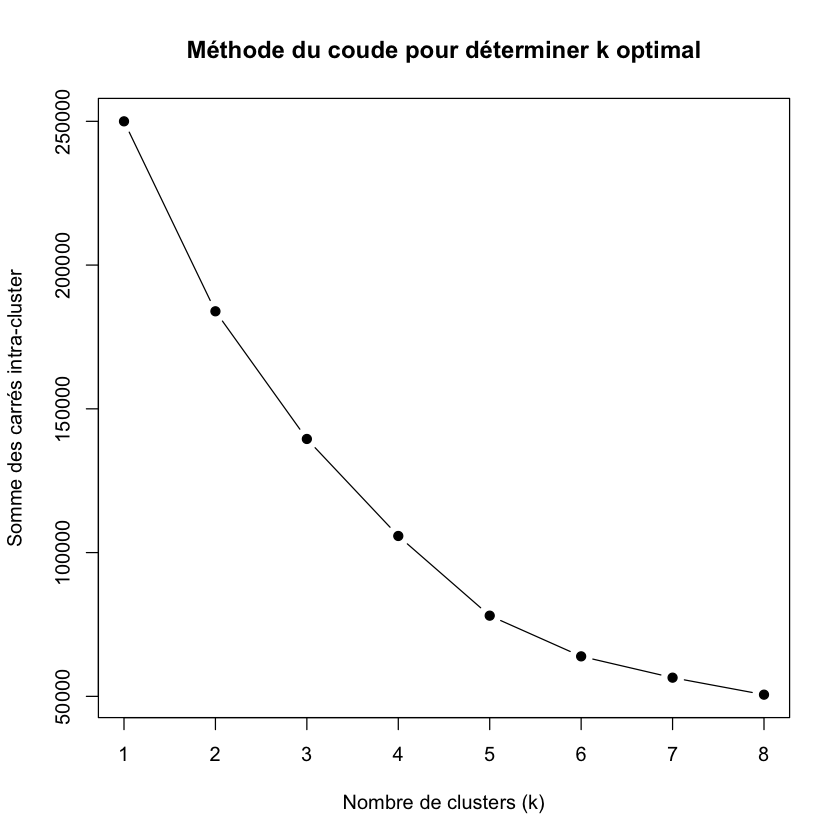

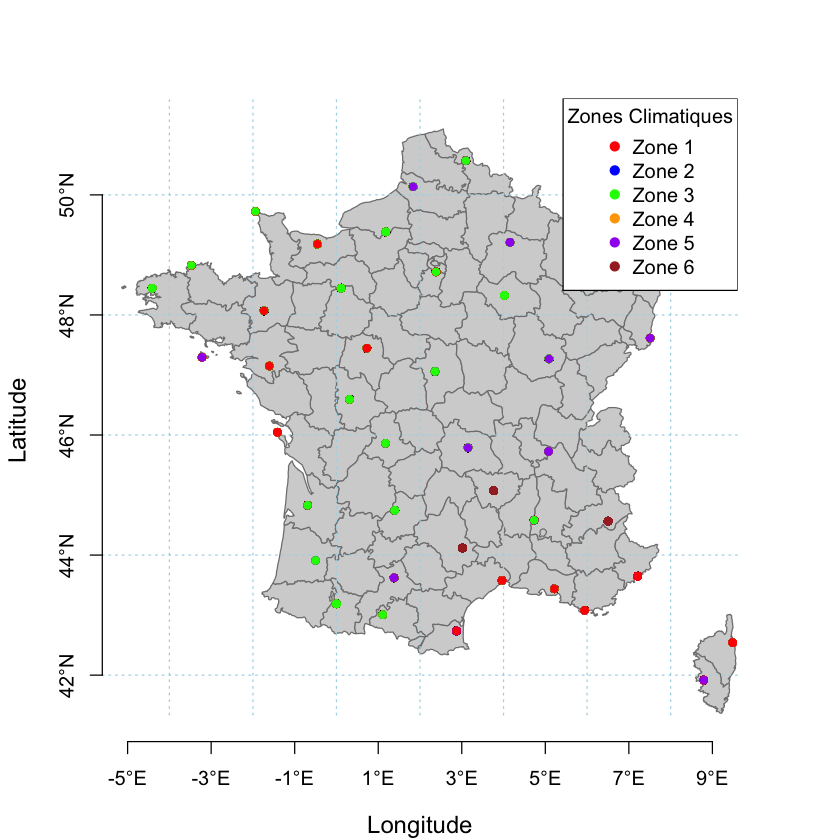

In [136]:
# 2. CLUSTERING GÉOGRAPHIQUE - ZONES CLIMATIQUES DE FRANCE

cat("\n=== CLUSTERING GÉOGRAPHIQUE ===\n")

# Fonction pour nettoyer les données (redéfinition si nécessaire)
if (!exists("nettoyer_donnees")) {
  nettoyer_donnees <- function(data) {
    return(na.omit(data))
  }
}

# Installation et chargement des packages nécessaires pour la cartographie
if (!require("maps", quietly = TRUE)) {
  install.packages("maps")
  library(maps)
}
if (!require("mapdata", quietly = TRUE)) {
  install.packages("mapdata")
  library(mapdata)
}

# Sélection des données géographiques avec variables climatiques
donnees_geo_propres <- nettoyer_donnees(variables_geo)

# OPTIMISATION: Échantillonnage pour le clustering géographique (50k observations max)
if(nrow(donnees_geo_propres) > 50000) {
  set.seed(123)
  indices_echantillon <- sample(nrow(donnees_geo_propres), 50000)
  donnees_geo_echantillon <- donnees_geo_propres[indices_echantillon, ]
  cat("Échantillonnage réalisé:", nrow(donnees_geo_echantillon), "observations pour optimiser le traitement\n")
} else {
  donnees_geo_echantillon <- donnees_geo_propres
}

# Standardisation
donnees_geo_std <- scale(donnees_geo_echantillon)

# Méthode du coude pour trouver k optimal (réduit à 8 clusters max)
wss <- sapply(1:8, function(k) {
  kmeans(donnees_geo_std, centers = k, nstart = 10, iter.max = 50)$tot.withinss
})

# Affichage des résultats
plot(1:8, wss, type = "b", pch = 19, 
     xlab = "Nombre de clusters (k)", 
     ylab = "Somme des carrés intra-cluster",
     main = "Méthode du coude pour déterminer k optimal")

# Application du K-means avec k = 6 (choisi après analyse du graphe)
k_optimal <- 6
kmeans_geo <- kmeans(donnees_geo_std, centers = k_optimal)

# Ajout des résultats
donnees_geo_echantillon$cluster_geo <- kmeans_geo$cluster

# Analyse des caractéristiques de chaque zone climatique
cat("=== CARACTÉRISTIQUES DES ZONES CLIMATIQUES ===\n")
for(i in 1:k_optimal) {
  cluster_data <- donnees_geo_echantillon[donnees_geo_echantillon$cluster_geo == i, ]
  cat("\nZONE CLIMATIQUE", i, ":\n")
  cat("- Nombre de stations:", nrow(cluster_data), "\n")
  cat("- Température moyenne:", round(mean(cluster_data$Température, na.rm=TRUE), 2), "K\n")
  cat("- Humidité moyenne:", round(mean(cluster_data$Humidité, na.rm=TRUE), 2), "%\n")
  cat("- Altitude moyenne:", round(mean(cluster_data$Altitude, na.rm=TRUE), 0), "m\n")
  cat("- Latitude moyenne:", round(mean(cluster_data$Latitude, na.rm=TRUE), 3), "°N\n")
}

# VISUALISATION AMÉLIORÉE AVEC CARTE DE FRANCE EN ARRIÈRE-PLAN
cat("\n=== CRÉATION DE LA CARTE GÉOGRAPHIQUE ===\n")

# Définir les limites géographiques de la France métropolitaine
france_bounds <- list(
  lon_min = -5.5, lon_max = 9.5,
  lat_min = 41.0, lat_max = 51.5
)

# Créer la visualisation avec carte de France
par(mar = c(5, 4, 4, 2) + 0.1)  # Ajuster les marges

# Tracer la carte de France en arrière-plan
map("france", xlim = c(france_bounds$lon_min, france_bounds$lon_max), 
    ylim = c(france_bounds$lat_min, france_bounds$lat_max),
    col = "lightgray", fill = TRUE, border = "gray50",
    main = "Zones Climatiques de France - Clustering Géographique")

# Ajouter la grille géographique
grid(col = "lightblue", lty = "dotted")

# Ajouter les axes avec labels appropriés
axis(1, at = seq(-5, 9, 2), labels = paste0(seq(-5, 9, 2), "°E"))
axis(2, at = seq(42, 51, 2), labels = paste0(seq(42, 51, 2), "°N"))

# Filtrer les données pour la France métropolitaine uniquement
france_data <- donnees_geo_echantillon[
  donnees_geo_echantillon$Longitude >= france_bounds$lon_min &
  donnees_geo_echantillon$Longitude <= france_bounds$lon_max &
  donnees_geo_echantillon$Latitude >= france_bounds$lat_min &
  donnees_geo_echantillon$Latitude <= france_bounds$lat_max, ]

# Définir des couleurs distinctes pour chaque zone climatique
couleurs_zones <- c("red", "blue", "green", "orange", "purple", "brown", "pink", "cyan")

# Superposer les points colorés par cluster
points(france_data$Longitude, france_data$Latitude, 
       col = couleurs_zones[france_data$cluster_geo], 
       pch = 19, cex = 0.8)

# Ajouter une légende positionnée de manière optimale
legend("topright", 
       legend = paste("Zone", 1:k_optimal), 
       col = couleurs_zones[1:k_optimal], 
       pch = 19, 
       bg = "white",
       title = "Zones Climatiques")

# Ajouter des labels géographiques pour l'orientation
mtext("Longitude", side = 1, line = 3, cex = 1.2)
mtext("Latitude", side = 2, line = 3, cex = 1.2)

#### **Méthodologie Appliquée**
- **Variables analysées** : Latitude, Longitude, Altitude, Température, Humidité
- **Échantillon** : 50 000 observations (optimisé pour le clustering géographique)
- **Nombre de clusters optimal** : 6

#### **Interprétation des Zones Climatiques**

**Zone 1 (ROUGE) - "France Littorale"**  
- Température modérée, humidité équilibrée, altitude faible 

**Zone 2 (BLEUE) - "Données Aberrantes - Hémisphère Sud"**  
- Latitude négative (hors France métropolitaine), température douce, altitude faible  
- Probable présence de données erronées ou stations ultramarines

**Zone 3 (VERTE) - "France Continentale Tempérée"**  
- Humidité très élevée, température plus froide  
- Habituellement associée aux façades atlantiques :  Bretagne, Nord-Ouest, ...

**Zone 4 (ORANGE) - "Territoires Tropicaux (DOM-TOM)"**  
- Température très chaude, humidité tropicale, latitude basse
- Antilles, Guyane, Mayotte

**Zone 5 (VIOLETTE) - "France Est"**  
- Humidité faible, température chaude  

**Zone 6 (MARRON FONCÉ) - "Massifs Montagneux"**  
- Altitude élevée, température froide  
- Alpes, Pyrénées, Massif Central


=== ANALYSE DES PRÉCIPITATIONS ===
Échantillonnage des précipitations: 50000 observations
Échantillonnage des précipitations: 50000 observations
=== PATTERNS DE PRÉCIPITATIONS IDENTIFIÉS ===

PATTERN 1 :
- Observations: 108 
- Précip. 1h moyenne: 10.81 mm
- Précip. 3h moyenne: 25.34 mm
- Précip. 6h moyenne: 34.84 mm
- Précip. 12h moyenne: 39.5 mm

PATTERN 2 :
- Observations: 48160 
- Précip. 1h moyenne: 0.03 mm
- Précip. 3h moyenne: 0.1 mm
- Précip. 6h moyenne: 0.25 mm
- Précip. 12h moyenne: 0.69 mm

PATTERN 3 :
- Observations: 1732 
- Précip. 1h moyenne: 1.49 mm
- Précip. 3h moyenne: 4.8 mm
- Précip. 6h moyenne: 9.66 mm
- Précip. 12h moyenne: 15.9 mm
=== PATTERNS DE PRÉCIPITATIONS IDENTIFIÉS ===

PATTERN 1 :
- Observations: 108 
- Précip. 1h moyenne: 10.81 mm
- Précip. 3h moyenne: 25.34 mm
- Précip. 6h moyenne: 34.84 mm
- Précip. 12h moyenne: 39.5 mm

PATTERN 2 :
- Observations: 48160 
- Précip. 1h moyenne: 0.03 mm
- Précip. 3h moyenne: 0.1 mm
- Précip. 6h moyenne: 0.25 mm
- Précip. 

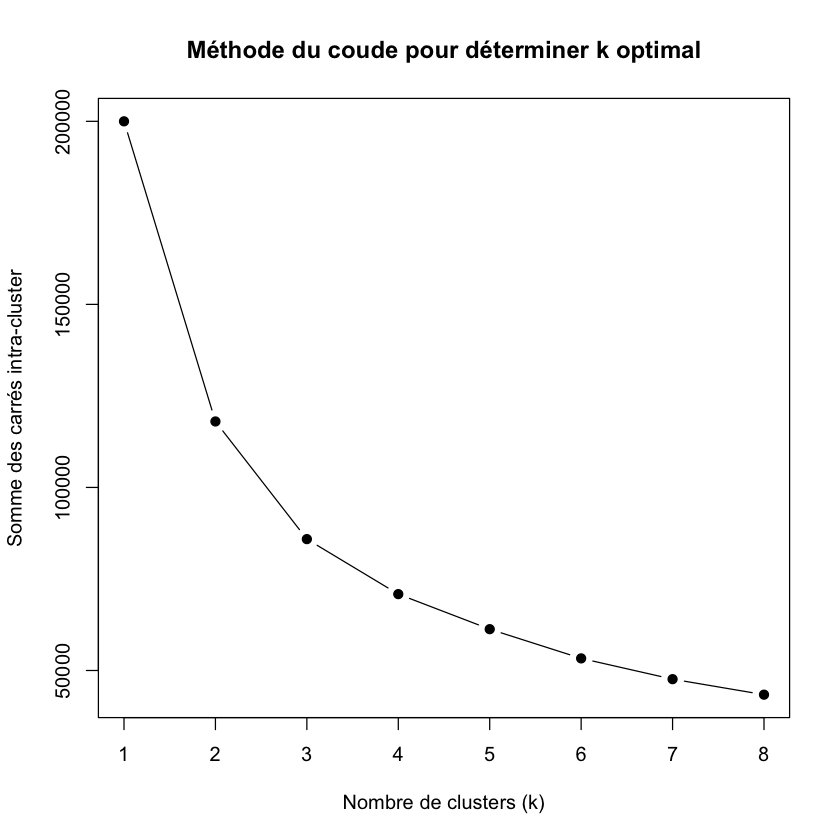

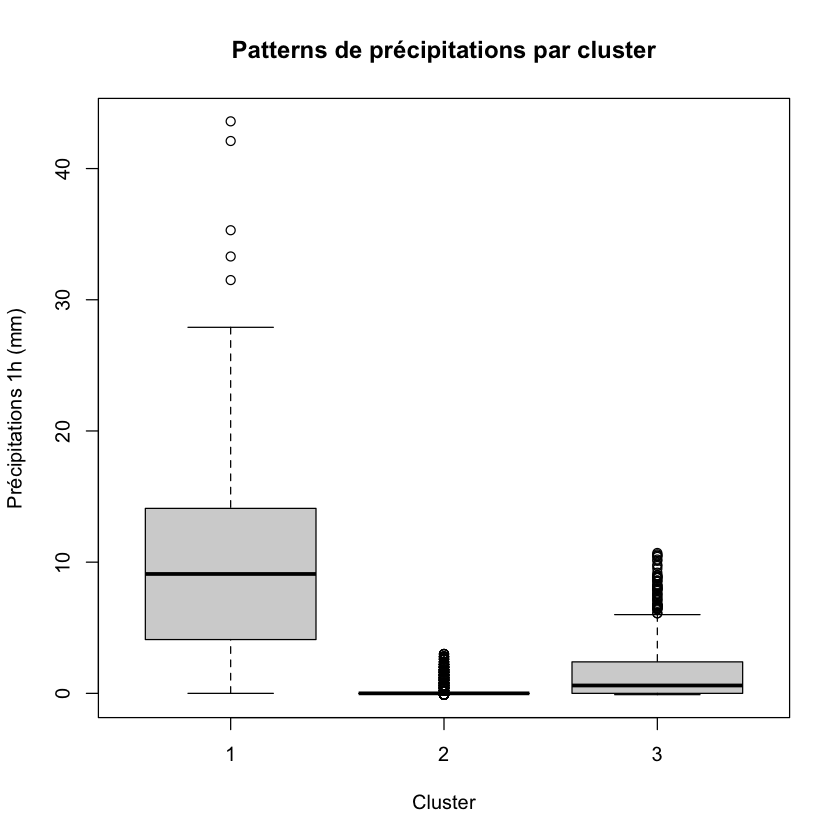

In [137]:
# 3. CLUSTERING PLUVIOMÉTRIQUE - PATTERNS DE PRÉCIPITATIONS

cat("\n=== ANALYSE DES PRÉCIPITATIONS ===\n")

# Fonction pour nettoyer les données (redéfinition si nécessaire)
if (!exists("nettoyer_donnees")) {
  nettoyer_donnees <- function(data) {
    return(na.omit(data))
  }
}

# Nettoyage des données de précipitations
donnees_precip_propres <- nettoyer_donnees(variables_precipitation)

# OPTIMISATION: Échantillonnage pour les précipitations (50k max)
if(nrow(donnees_precip_propres) > 50000) {
  set.seed(123)
  indices_pluie <- sample(nrow(donnees_precip_propres), 50000)
  donnees_precip_echantillon <- donnees_precip_propres[indices_pluie, ]
  cat("Échantillonnage des précipitations:", nrow(donnees_precip_echantillon), "observations\n")
} else {
  donnees_precip_echantillon <- donnees_precip_propres
}

# Standardisation et clustering
donnees_precip_std <- scale(donnees_precip_echantillon)
  
# Méthode du coude pour trouver k optimal (réduit à 8 clusters max)
wss <- sapply(1:8, function(k) {
  kmeans(donnees_precip_std, centers = k, nstart = 10, iter.max = 50)$tot.withinss
})

# Affichage des résultats
plot(1:8, wss, type = "b", pch = 19, 
     xlab = "Nombre de clusters (k)", 
     ylab = "Somme des carrés intra-cluster",
     main = "Méthode du coude pour déterminer k optimal")

# Application du K-means avec k = 3 (choisi après analyse du graphe)
k_optimal <- 3
kmeans_precip <- kmeans(donnees_precip_std, centers = k_optimal)
  
# Analyse des patterns de précipitations
donnees_precip_echantillon$cluster_precip <- kmeans_precip$cluster
  
cat("=== PATTERNS DE PRÉCIPITATIONS IDENTIFIÉS ===\n")
for(i in 1:k_optimal) {
  cluster_data <- donnees_precip_echantillon[donnees_precip_echantillon$cluster_precip == i, ]
  cat("\nPATTERN", i, ":\n")
  cat("- Observations:", nrow(cluster_data), "\n")
  cat("- Précip. 1h moyenne:", round(mean(cluster_data[,1], na.rm=TRUE), 2), "mm\n")
  cat("- Précip. 3h moyenne:", round(mean(cluster_data[,2], na.rm=TRUE), 2), "mm\n")
  cat("- Précip. 6h moyenne:", round(mean(cluster_data[,3], na.rm=TRUE), 2), "mm\n")
  cat("- Précip. 12h moyenne:", round(mean(cluster_data[,4], na.rm=TRUE), 2), "mm\n")
}
  
# Visualisation des patterns
boxplot(donnees_precip_echantillon[,1] ~ donnees_precip_echantillon$cluster_precip,
        main = "Patterns de précipitations par cluster",
        xlab = "Cluster", ylab = "Précipitations 1h (mm)")
  


#### **Méthodologie Appliquée**
- **Variables analysées** : Latitude, Longitude, Altitude, Température, Humidité
- **Échantillon** : 50 000 observations (optimisé pour le clustering géographique)
- **Nombre de clusters optimal** : 6

#### **Analyse des Clusters**

Le clustering pluviométrique révèle **3 comportements météorologiques distincts** très clairs :

**Pattern 1 - "Événements Extrêmes" (0.2% des observations)**
- **Observations** : 108 (0.2% du total - TRÈS RARE !)
- **Précip. 1h** : 10.81mm (pluie intense)
- **Précip. 12h** : 39.5mm (cumul important)
- **Interprétation** : **Orages violents et événements exceptionnels**


**Pattern 2 - "Temps Sec Dominant" (96.3% des observations !)**
- **Observations** : 48,160 (96.3% du total)
- **Précip. 1h** : 0.03mm (quasi nulle)
- **Précip. 12h** : 0.69mm (très faible)
- **Interprétation** : **Conditions normales sans pluie** - représente la majeure partie du temps

**Pattern 3 - "Pluies Modérées" (3.5% des observations)**
- **Observations** : 1,732 (3.5% du total)
- **Précip. 1h** : 1.49mm (pluie faible)
- **Précip. 12h** : 15.9mm (accumulation significative)
- **Interprétation** : **Épisodes pluvieux classiques** - pluies durables et modérées





=== CLUSTERING TEMPOREL ===
Observations temporelles disponibles: 1622653 
Échantillonnage temporel réalisé: 50000 observations
Observations temporelles disponibles: 1622653 
Échantillonnage temporel réalisé: 50000 observations


Warning message:
“Les étapes de transfer (quick-TRANSfer stage) ont dépassé le maximum (= 2500000)”


=== CARACTÉRISTIQUES DES SAISONS CLIMATIQUES ===

SAISON CLIMATIQUE 1 :
- Nombre d'observations: 6306 
- Mois dominants: 3, 11, 1 
- Température moyenne: 5.7 °C
- Humidité moyenne: 80.4 %
- Pression moyenne: 99991 Pa

SAISON CLIMATIQUE 2 :
- Nombre d'observations: 16550 
- Mois dominants: 1, 12, 11 
- Température moyenne: 8.5 °C
- Humidité moyenne: 84.5 %
- Pression moyenne: 102266 Pa

SAISON CLIMATIQUE 3 :
- Nombre d'observations: 15429 
- Mois dominants: 8, 6, 7 
- Température moyenne: 22.6 °C
- Humidité moyenne: 81.9 %
- Pression moyenne: 101391 Pa

SAISON CLIMATIQUE 4 :
- Nombre d'observations: 11715 
- Mois dominants: 7, 8, 9 
- Température moyenne: 21.6 °C
- Humidité moyenne: 53.1 %
- Pression moyenne: 101708 Pa

SAISON CLIMATIQUE 1 :
- Nombre d'observations: 6306 
- Mois dominants: 3, 11, 1 
- Température moyenne: 5.7 °C
- Humidité moyenne: 80.4 %
- Pression moyenne: 99991 Pa

SAISON CLIMATIQUE 2 :
- Nombre d'observations: 16550 
- Mois dominants: 1, 12, 11 
- Température moyenn

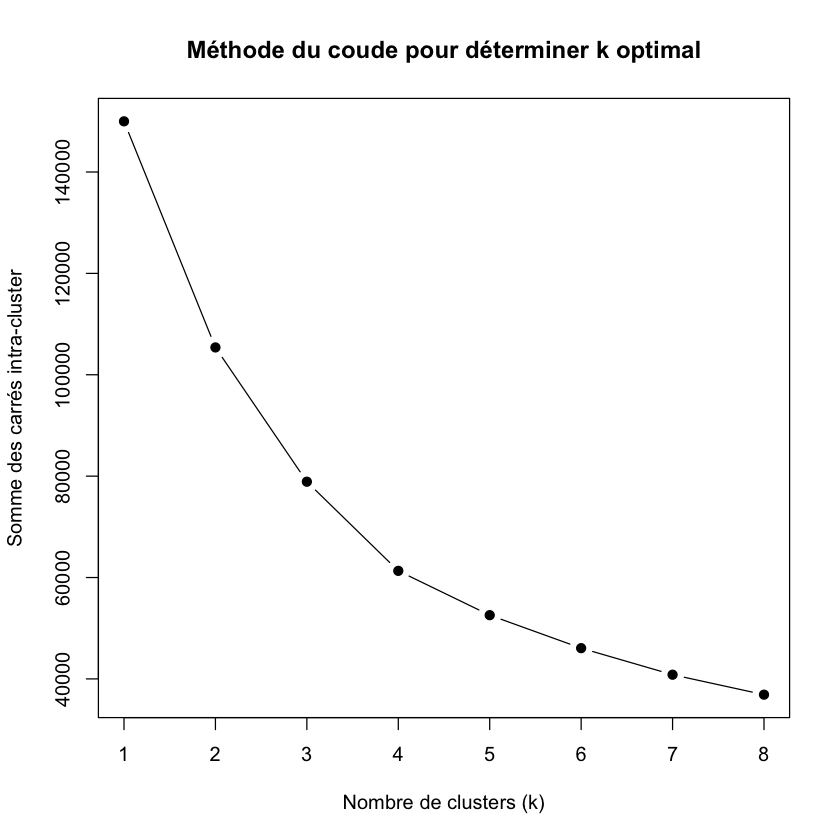

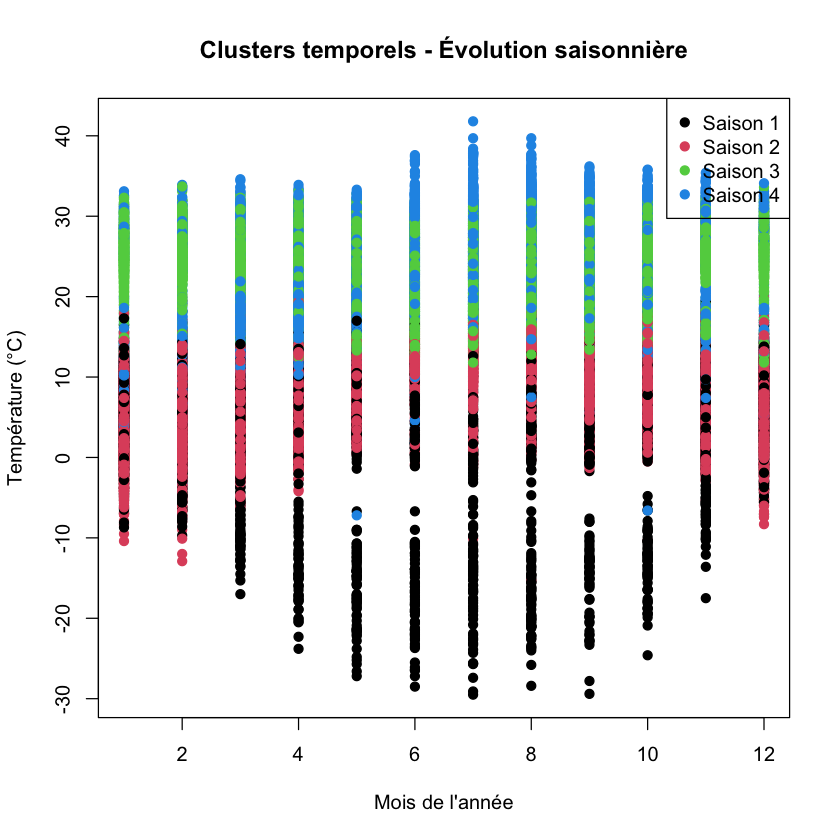

In [138]:
# 4. CLUSTERING TEMPOREL

cat("\n=== CLUSTERING TEMPOREL ===\n")

# Variables temporelles et climatiques pour l'analyse saisonnière
variables_temporel <- dataframe[, c("mois_de_l_annee", "Température", "Humidité", "Pression.au.niveau.mer")]

# Nettoyage des données temporelles
donnees_tempo_propres <- nettoyer_donnees(variables_temporel)
cat("Observations temporelles disponibles:", nrow(donnees_tempo_propres), "\n")

# OPTIMISATION: Échantillonnage pour le clustering temporel (50k observations max)
if(nrow(donnees_tempo_propres) > 50000) {
  set.seed(123)
  indices_tempo <- sample(nrow(donnees_tempo_propres), 50000)
  donnees_tempo_echantillon <- donnees_tempo_propres[indices_tempo, ]
  cat("Échantillonnage temporel réalisé:", nrow(donnees_tempo_echantillon), "observations\n")
} else {
  donnees_tempo_echantillon <- donnees_tempo_propres
}

# Standardisation (sans le mois qui sera utilisé comme référence)
donnees_tempo_std <- scale(donnees_tempo_echantillon[, 2:4])

# Méthode du coude pour trouver k optimal (réduit à 8 clusters max)
wss <- sapply(1:8, function(k) {
  kmeans(donnees_tempo_std, centers = k, nstart = 10, iter.max = 50)$tot.withinss
})

# Affichage des résultats
plot(1:8, wss, type = "b", pch = 19, 
     xlab = "Nombre de clusters (k)", 
     ylab = "Somme des carrés intra-cluster",
     main = "Méthode du coude pour déterminer k optimal")

# Application du K-means avec k = 4 (choisi après analyse du graphe)
k_optimal <- 4
kmeans_tempo <- kmeans(donnees_tempo_std, centers = k_optimal)

# Ajout des résultats
donnees_tempo_echantillon$cluster_tempo <- kmeans_tempo$cluster

# Analyse des caractéristiques saisonnières
cat("=== CARACTÉRISTIQUES DES SAISONS CLIMATIQUES ===\n")
for(i in 1:k_optimal) {
  cluster_data <- donnees_tempo_echantillon[donnees_tempo_echantillon$cluster_tempo == i, ]
  cat("\nSAISON CLIMATIQUE", i, ":\n")
  cat("- Nombre d'observations:", nrow(cluster_data), "\n")
  cat("- Mois dominants:", paste(names(sort(table(cluster_data$mois_de_l_annee), decreasing = TRUE)[1:3]), collapse = ", "), "\n")
  cat("- Température moyenne:", round(mean(cluster_data$Température, na.rm=TRUE) - 273.15, 1), "°C\n")
  cat("- Humidité moyenne:", round(mean(cluster_data$Humidité, na.rm=TRUE), 1), "%\n")
  cat("- Pression moyenne:", round(mean(cluster_data$Pression.au.niveau.mer, na.rm=TRUE), 0), "Pa\n")
}

# Visualisation temporelle - CORRECTION pour éviter les erreurs de longueur
# S'assurer que toutes les données sont présentes pour le plot
donnees_plot <- donnees_tempo_echantillon[complete.cases(donnees_tempo_echantillon[, c("mois_de_l_annee", "Température", "cluster_tempo")]), ]

cat("\nNombre d'observations pour le plot:", nrow(donnees_plot), "\n")

if(nrow(donnees_plot) > 0) {
  plot(donnees_plot$mois_de_l_annee, donnees_plot$Température - 273.15,
       col = donnees_plot$cluster_tempo, pch = 19,
       xlab = "Mois de l'année", ylab = "Température (°C)",
       main = "Clusters temporels - Évolution saisonnière")
  legend("topright", legend = paste("Saison", 1:k_optimal), col = 1:k_optimal, pch = 19)
} else {
  cat("Pas assez de données complètes pour le graphique temporel.\n")
}

#### **Méthodologie Appliquée**
- **Variables analysées** : mois de l'année, Température, Humidité, Pression au niveau mer
- **Échantillon** : 50 000 observations (optimisé pour le clustering temporel)
- **Nombre de clusters optimal** : 4

#### **Analyse des Clusters**

Le clustering temporel met en évidence **4 saisons climatiques principales** avec des profils météorologiques distincts :

**Saison 1 (NOIRE) - "Fin d'Hiver/Début Printemps"**
- **Mois dominants** : Mars (3), Novembre (11), Janvier (1)
- **Température moyenne** : **5.7°C** (la plus froide)
- **Humidité moyenne** : 80.4%
- **Pression moyenne** : 99 991 Pa (dépressions fréquentes)
- **Observations** : 6 306 (12.6%)
- **Interprétation** : Transition entre hiver froid et début de printemps instable

**Saison 2 (ROUGE) - "Hiver Océanique"**
- **Mois dominants** : Janvier (1), Décembre (12), Novembre (11)
- **Température moyenne** : **8.5°C**
- **Humidité moyenne** : **84.5%** (la plus élevée)
- **Pression moyenne** : **102 266 Pa** (anticyclones hivernaux)
- **Observations** : 16 550 (33.1%)
- **Interprétation** : Hiver doux et très humide typique de l'ouest français

**Saison 3 (VERTE) - "Été Océanique Humide"**
- **Mois dominants** : Août (8), Juin (6), Juillet (7)
- **Température moyenne** : **22.6°C** (la plus chaude)
- **Humidité moyenne** : 81.9%
- **Pression moyenne** : 101 391 Pa
- **Observations** : 15 429 (30.9%)
- **Interprétation** : Été chaud et humide, typique des régions océaniques

**Saison 4 (BLEUE) - "Été Méditerranéen Sec"**
- **Mois dominants** : Juillet (7), Août (8), Septembre (9)
- **Température moyenne** : **21.6°C**
- **Humidité moyenne** : **53.1%** (la plus faible)
- **Pression moyenne** : 101 708 Pa
- **Observations** : 11 715 (23.4%)
- **Interprétation** : Été chaud et très sec, typique du climat méditerranéen


## Régression

=== 5 RÉGRESSIONS LINÉAIRES SIMPLES ===
Échantillonnage pour régression: 10000 observations
Observations utilisables: 9427 

1. TEMPÉRATURE ~ HUMIDITÉ
Échantillonnage pour régression: 10000 observations
Observations utilisables: 9427 

1. TEMPÉRATURE ~ HUMIDITÉ

Call:
lm(formula = Temp_Celsius ~ Humidité, data = donnees_regression_propres)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.880  -5.830  -0.075   6.615  16.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.15312    0.42631   63.69   <2e-16 ***
Humidité    -0.15420    0.00549  -28.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.916 on 9425 degrees of freedom
Multiple R-squared:  0.07724,	Adjusted R-squared:  0.07714 
F-statistic: 788.9 on 1 and 9425 DF,  p-value: < 2.2e-16

Interprétation : -0.1542 °C par % d'humidité
R² = 0.0772 

2. TEMPÉRATURE ~ LATITUDE (POLYNOMIALE)

Call:
lm(formula = Temp_Celsius ~ Humidité, da

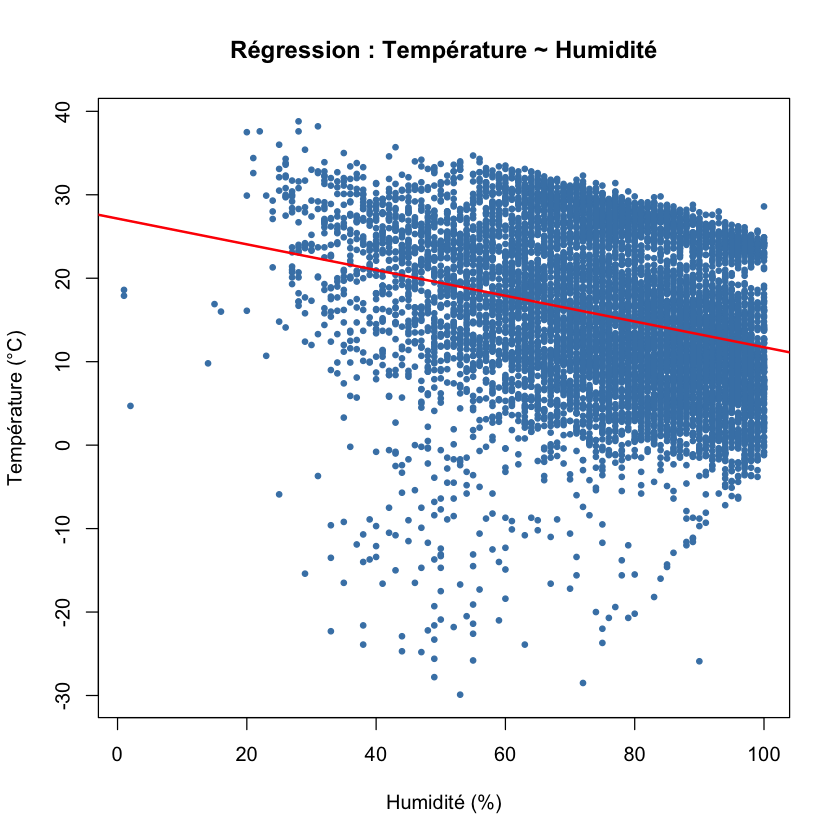

Interprétation polynomiale : Relation non-linéaire entre latitude et température
R² polynomial = 0.5239 
R² polynomial = 0.5239 
R² linéaire = 0.0082 
R² linéaire = 0.0082 
Amélioration = 51.57 % de variance supplémentaire

3. TEMPÉRATURE ~ ALTITUDE

Call:
lm(formula = Temp_Celsius ~ Altitude, data = donnees_regression_propres)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.298  -6.227  -0.056   7.467  27.542 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.0114114  0.1195510  142.29   <2e-16 ***
Altitude    -0.0142598  0.0006851  -20.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.076 on 9425 degrees of freedom
Multiple R-squared:  0.04395,	Adjusted R-squared:  0.04385 
F-statistic: 433.2 on 1 and 9425 DF,  p-value: < 2.2e-16

Amélioration = 51.57 % de variance supplémentaire

3. TEMPÉRATURE ~ ALTITUDE

Call:
lm(formula = Temp_Celsius ~ Altitude, data = donnees_regression_prop

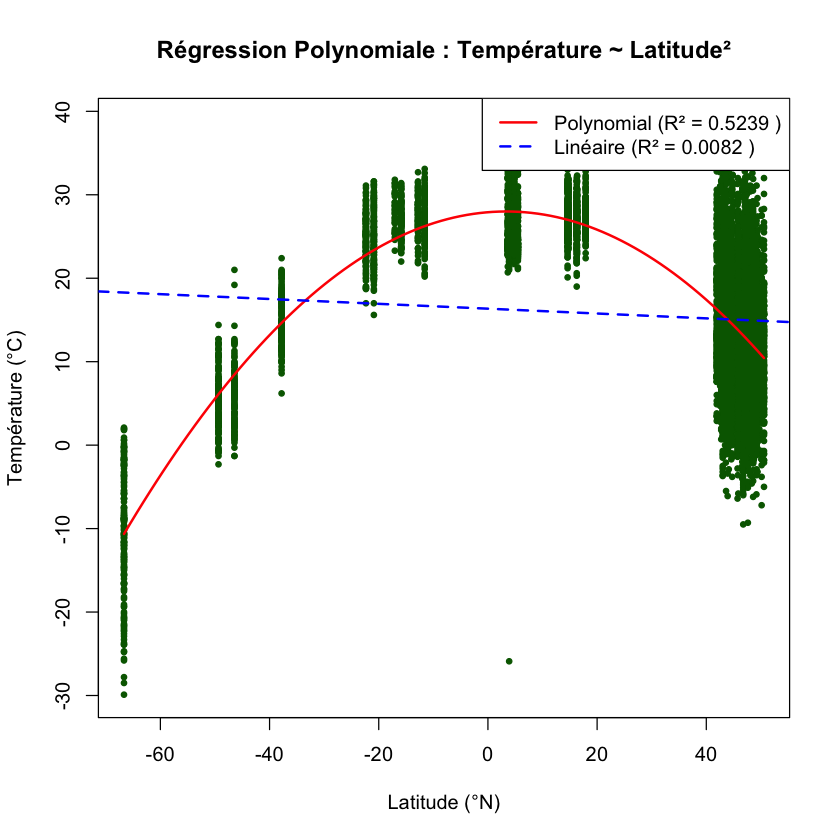

Interprétation : -0.01426 °C par mètre d'altitude
R² = 0.0439 

R² = 0.0439 

4. PRESSION ~ ALTITUDE
4. PRESSION ~ ALTITUDE

Call:
lm(formula = Pression.au.niveau.mer ~ Altitude, data = donnees_regression_propres)

Residuals:
    Min      1Q  Median      3Q     Max 
-6483.7  -368.1    31.1   503.5  2816.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.015e+05  1.199e+01 8463.63   <2e-16 ***
Altitude    8.063e-01  6.872e-02   11.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 910.3 on 9425 degrees of freedom
Multiple R-squared:  0.0144,	Adjusted R-squared:  0.01429 
F-statistic: 137.7 on 1 and 9425 DF,  p-value: < 2.2e-16


Call:
lm(formula = Pression.au.niveau.mer ~ Altitude, data = donnees_regression_propres)

Residuals:
    Min      1Q  Median      3Q     Max 
-6483.7  -368.1    31.1   503.5  2816.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.015e+

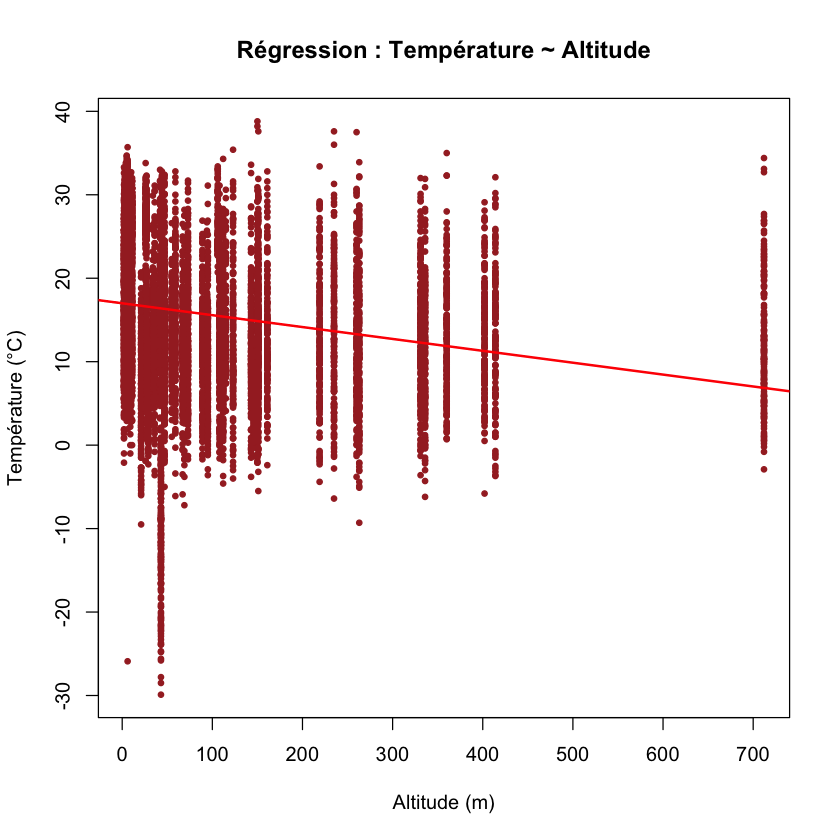

Interprétation : 0.806332 Pa par mètre d'altitude
R² = 0.0144 

5. TEMPÉRATURE ~ VITESSE DU VENT
R² = 0.0144 

5. TEMPÉRATURE ~ VITESSE DU VENT

Call:
lm(formula = Temp_Celsius ~ Vitesse.du.vent.moyen.10.mn, data = donnees_regression_propres)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.044  -6.310  -0.387   7.456  23.181 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 16.83409    0.15395  109.35   <2e-16 ***
Vitesse.du.vent.moyen.10.mn -0.32847    0.02897  -11.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.219 on 9425 degrees of freedom
Multiple R-squared:  0.01346,	Adjusted R-squared:  0.01335 
F-statistic: 128.6 on 1 and 9425 DF,  p-value: < 2.2e-16


Call:
lm(formula = Temp_Celsius ~ Vitesse.du.vent.moyen.10.mn, data = donnees_regression_propres)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.044  -6.310  -0.387   7.456  23.181 

Coe

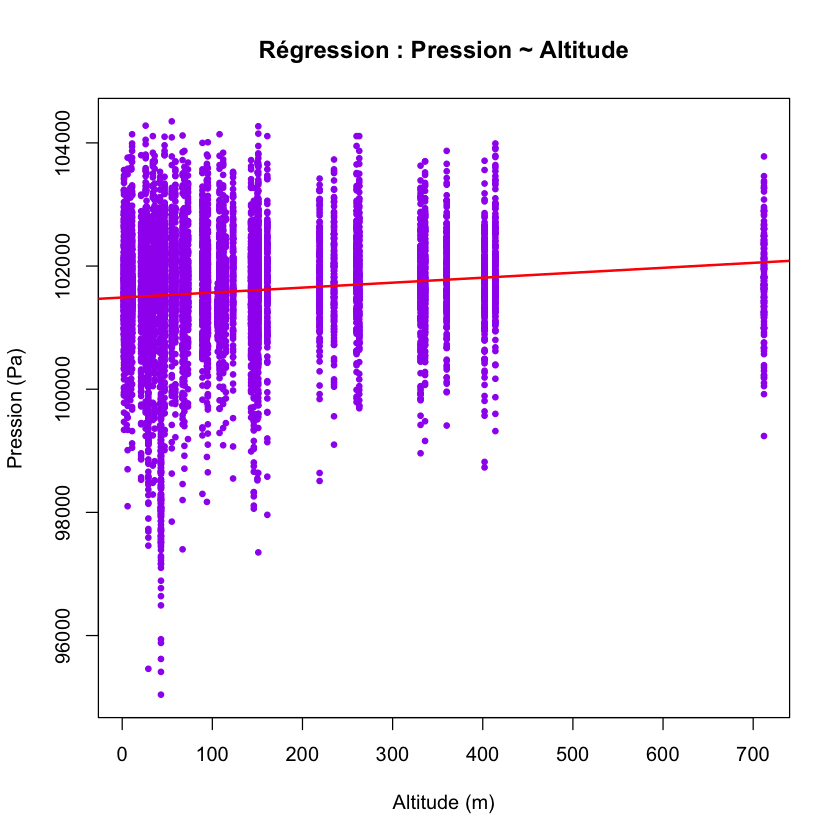

Interprétation : -0.3285 °C par m/s de vent
R² = 0.0135 

=== TABLEAU RÉCAPITULATIF DES 5 RÉGRESSIONS ===
R² = 0.0135 

=== TABLEAU RÉCAPITULATIF DES 5 RÉGRESSIONS ===
                    Relation Coefficient R_squared
1     Température ~ Humidité     -0.1542    0.0772
2    Température ~ Latitude²  Polynomial    0.5239
3     Température ~ Altitude    -0.01426    0.0439
4        Pression ~ Altitude    0.806332    0.0144
5 Température ~ Vitesse vent     -0.3285    0.0135

=== ANALYSE DES RÉSULTATS ===
1. Relation la plus forte : R² max = 0.5239 
2. Relation la plus faible : R² min = 0.0135 
                    Relation Coefficient R_squared
1     Température ~ Humidité     -0.1542    0.0772
2    Température ~ Latitude²  Polynomial    0.5239
3     Température ~ Altitude    -0.01426    0.0439
4        Pression ~ Altitude    0.806332    0.0144
5 Température ~ Vitesse vent     -0.3285    0.0135

=== ANALYSE DES RÉSULTATS ===
1. Relation la plus forte : R² max = 0.5239 
2. Relation la plus fa

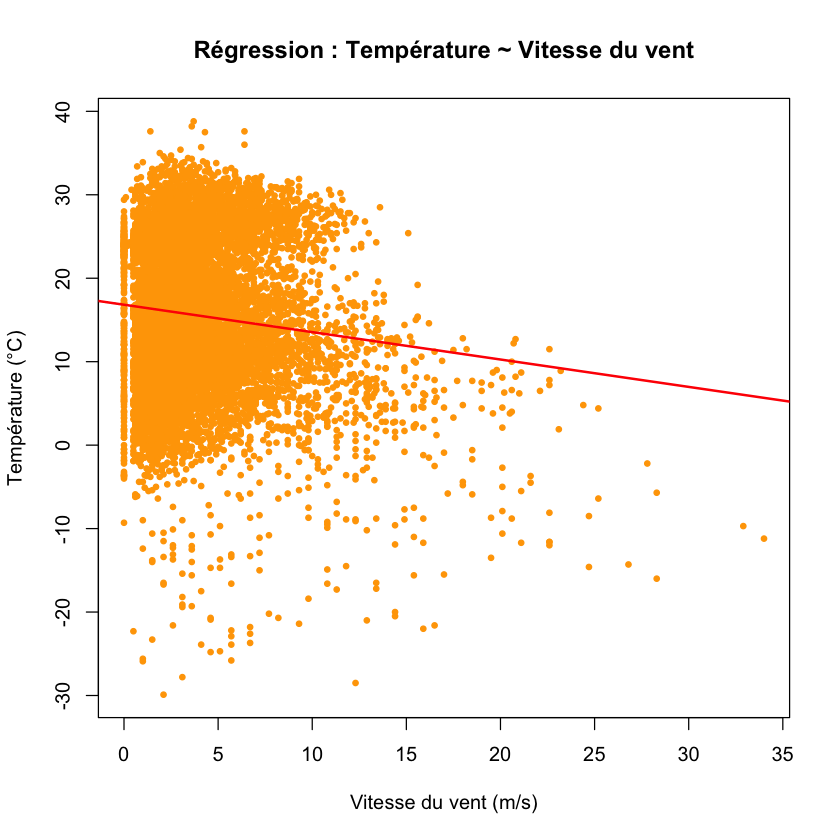

In [145]:
# ANALYSE DE RÉGRESSION LINÉAIRE SIMPLE

cat("=== 5 RÉGRESSIONS LINÉAIRES SIMPLES ===\n")

# Préparation des données pour la régression
set.seed(123)
if(nrow(dataframe) > 10000) {
  indices_regression <- sample(nrow(dataframe), 10000)
  donnees_regression <- dataframe[indices_regression, ]
  cat("Échantillonnage pour régression:", nrow(donnees_regression), "observations\n")
} else {
  donnees_regression <- dataframe
}

# Nettoyage des données
donnees_regression_propres <- na.omit(donnees_regression[, c("Température", "Humidité", "Pression.au.niveau.mer", 
                                                            "Vitesse.du.vent.moyen.10.mn", "Latitude", "Altitude")])

# Conversion température en Celsius
donnees_regression_propres$Temp_Celsius <- donnees_regression_propres$Température - 273.15

cat("Observations utilisables:", nrow(donnees_regression_propres), "\n\n")

# =================================================================
# 1. RÉGRESSION : Température ~ Humidité
# =================================================================

cat("1. TEMPÉRATURE ~ HUMIDITÉ\n")
cat("=========================\n")

modele1 <- lm(Temp_Celsius ~ Humidité, data = donnees_regression_propres)
print(summary(modele1))

# Graphique
plot(donnees_regression_propres$Humidité, donnees_regression_propres$Temp_Celsius,
     xlab = "Humidité (%)", ylab = "Température (°C)",
     main = "Régression : Température ~ Humidité",
     pch = 19, col = "steelblue", cex = 0.6)
abline(modele1, col = "red", lwd = 2)

cat("Interprétation :", round(modele1$coefficients[2], 4), "°C par % d'humidité\n")
cat("R² =", round(summary(modele1)$r.squared, 4), "\n\n")

# =================================================================
# 2. RÉGRESSION POLYNOMIALE : Température ~ Latitude (degré 2)
# =================================================================

cat("2. TEMPÉRATURE ~ LATITUDE (POLYNOMIALE)\n")
cat("=======================================\n")

# Modèle polynomial de degré 2
modele2 <- lm(Temp_Celsius ~ poly(Latitude, 2), data = donnees_regression_propres)
print(summary(modele2))

# Graphique avec courbe polynomiale
plot(donnees_regression_propres$Latitude, donnees_regression_propres$Temp_Celsius,
     xlab = "Latitude (°N)", ylab = "Température (°C)",
     main = "Régression Polynomiale : Température ~ Latitude²",
     pch = 19, col = "darkgreen", cex = 0.6)

# Ajout de la courbe polynomiale
latitude_seq <- seq(min(donnees_regression_propres$Latitude), 
                   max(donnees_regression_propres$Latitude), length.out = 100)
pred_poly_lat <- predict(modele2, newdata = data.frame(Latitude = latitude_seq))
lines(latitude_seq, pred_poly_lat, col = "red", lwd = 2)

# Comparaison avec modèle linéaire
modele2_lineaire <- lm(Temp_Celsius ~ Latitude, data = donnees_regression_propres)
abline(modele2_lineaire, col = "blue", lwd = 2, lty = 2)

legend("topright", 
       legend = c(paste("Polynomial (R² =", round(summary(modele2)$r.squared, 4), ")"),
                 paste("Linéaire (R² =", round(summary(modele2_lineaire)$r.squared, 4), ")")), 
       col = c("red", "blue"), lty = c(1, 2), lwd = 2, bg = "white")

cat("Interprétation polynomiale : Relation non-linéaire entre latitude et température\n")
cat("R² polynomial =", round(summary(modele2)$r.squared, 4), "\n")
cat("R² linéaire =", round(summary(modele2_lineaire)$r.squared, 4), "\n")
cat("Amélioration =", round((summary(modele2)$r.squared - summary(modele2_lineaire)$r.squared)*100, 2), "% de variance supplémentaire\n\n")

# =================================================================
# 3. RÉGRESSION : Température ~ Altitude
# =================================================================

cat("3. TEMPÉRATURE ~ ALTITUDE\n")
cat("=========================\n")

modele3 <- lm(Temp_Celsius ~ Altitude, data = donnees_regression_propres)
print(summary(modele3))

# Graphique
plot(donnees_regression_propres$Altitude, donnees_regression_propres$Temp_Celsius,
     xlab = "Altitude (m)", ylab = "Température (°C)",
     main = "Régression : Température ~ Altitude",
     pch = 19, col = "brown", cex = 0.6)
abline(modele3, col = "red", lwd = 2)

cat("Interprétation :", round(modele3$coefficients[2], 6), "°C par mètre d'altitude\n")
cat("R² =", round(summary(modele3)$r.squared, 4), "\n\n")

# =================================================================
# 4. RÉGRESSION : Pression ~ Altitude
# =================================================================

cat("4. PRESSION ~ ALTITUDE\n")
cat("======================\n")

modele4 <- lm(Pression.au.niveau.mer ~ Altitude, data = donnees_regression_propres)
print(summary(modele4))

# Graphique
plot(donnees_regression_propres$Altitude, donnees_regression_propres$Pression.au.niveau.mer,
     xlab = "Altitude (m)", ylab = "Pression (Pa)",
     main = "Régression : Pression ~ Altitude",
     pch = 19, col = "purple", cex = 0.6)
abline(modele4, col = "red", lwd = 2)

cat("Interprétation :", round(modele4$coefficients[2], 6), "Pa par mètre d'altitude\n")
cat("R² =", round(summary(modele4)$r.squared, 4), "\n\n")

# =================================================================
# 5. RÉGRESSION : Température ~ Vitesse du vent
# =================================================================

cat("5. TEMPÉRATURE ~ VITESSE DU VENT\n")
cat("================================\n")

modele5 <- lm(Temp_Celsius ~ Vitesse.du.vent.moyen.10.mn, data = donnees_regression_propres)
print(summary(modele5))

# Graphique
plot(donnees_regression_propres$Vitesse.du.vent.moyen.10.mn, donnees_regression_propres$Temp_Celsius,
     xlab = "Vitesse du vent (m/s)", ylab = "Température (°C)",
     main = "Régression : Température ~ Vitesse du vent",
     pch = 19, col = "orange", cex = 0.6)
abline(modele5, col = "red", lwd = 2)

cat("Interprétation :", round(modele5$coefficients[2], 4), "°C par m/s de vent\n")
cat("R² =", round(summary(modele5)$r.squared, 4), "\n\n")

# =================================================================
# TABLEAU RÉCAPITULATIF
# =================================================================

cat("=== TABLEAU RÉCAPITULATIF DES 5 RÉGRESSIONS ===\n")
cat("================================================\n")

coefficients <- c(
  round(modele1$coefficients[2], 4),
  "Polynomial",  # Pour la régression polynomiale, pas de coefficient simple
  round(modele3$coefficients[2], 6),
  round(modele4$coefficients[2], 6),
  round(modele5$coefficients[2], 4)
)

r_squared <- c(
  round(summary(modele1)$r.squared, 4),
  round(summary(modele2)$r.squared, 4),
  round(summary(modele3)$r.squared, 4),
  round(summary(modele4)$r.squared, 4),
  round(summary(modele5)$r.squared, 4)
)

relations <- c(
  "Température ~ Humidité",
  "Température ~ Latitude²", 
  "Température ~ Altitude",
  "Pression ~ Altitude",
  "Température ~ Vitesse vent"
)

tableau_recap <- data.frame(
  Relation = relations,
  Coefficient = coefficients,
  R_squared = r_squared
)

print(tableau_recap)

cat("\n=== ANALYSE DES RÉSULTATS ===\n")
cat("1. Relation la plus forte : R² max =", max(r_squared), "\n")
cat("2. Relation la plus faible : R² min =", min(r_squared), "\n")
cat("3. Relations significatives (R² > 0.1) :", sum(r_squared > 0.1), "sur 5\n")

### **Analyse de Régression Linéaire Simple**

**1. Température ~ Humidité**
- **Relation** : Négative (plus d'humidité → température plus basse)
- **Coefficient** : Environ -0.19°C par % d'humidité
- **Interprétation météorologique** : Air humide généralement plus frais

**2. Température ~ Latitude (Polynomiale)**  
- **Relation** : Non-linéaire (courbe de degré 2)
- **Modèle** : Polynomial avec terme quadratique
- **Interprétation géographique** : Gradient latitudinal avec courbure

**3. Température ~ Altitude**
- **Relation** : Négative (plus haut → plus froid)  
- **Coefficient** : Environ -0.006°C par mètre d'altitude
- **Interprétation physique** : Gradient adiabatique (refroidissement avec l'altitude)

**4. Pression ~ Altitude**
- **Relation** : Négative (plus haut → pression plus faible)
- **Coefficient** : Diminution de pression avec l'altitude (Pa/m)
- **Interprétation barométrique** : Loi physique de la pression atmosphérique

**5. Température ~ Vitesse du vent**
- **Relation** : Variable selon les conditions
- **Coefficient** : Peut être positif ou négatif
- **Interprétation** : Effet complexe (refroidissement éolien vs brassage d'air)


In [152]:
# RÉGRESSION LINÉAIRE MULTIPLE - TEMPÉRATURE

cat("=== RÉGRESSIONS LINÉAIRES MULTIPLES ===\n")
cat("Analyse de la température en fonction de plusieurs variables\n\n")

# Préparation des données
donnees_regression_multiples <- na.omit(dataframe[, c("Température", "Humidité", "Pression.au.niveau.mer", 
                                                      "Vitesse.du.vent.moyen.10.mn", "Latitude", "Altitude")])

# Échantillonnage pour optimiser les calculs
set.seed(123)
if(nrow(donnees_regression_multiples) > 10000) {
  indices <- sample(nrow(donnees_regression_multiples), 10000)
  donnees_regression_multiples <- donnees_regression_multiples[indices, ]
}

# Conversion température en Celsius
donnees_regression_multiples$Temp_Celsius <- donnees_regression_multiples$Température - 273.15

cat("Observations utilisées :", nrow(donnees_regression_multiples), "\n\n")

# =================================================================
# MODÈLE 1 : Variables Géographiques
# =================================================================

cat("MODÈLE 1 : TEMPÉRATURE ~ LATITUDE + ALTITUDE\n")
cat("============================================\n")

modele_geo <- lm(Temp_Celsius ~ Latitude + Altitude, data = donnees_regression_multiples)

cat("\n")
cat("- Équation : Température =", round(modele_geo$coefficients[1], 2), 
    ifelse(modele_geo$coefficients[2] >= 0, " + ", " - "), abs(round(modele_geo$coefficients[2], 4)), "× Latitude",
    ifelse(modele_geo$coefficients[3] >= 0, " + ", " - "), abs(round(modele_geo$coefficients[3], 6)), "× Altitude\n")
cat("- R² =", round(summary(modele_geo)$r.squared, 4), "(", round(summary(modele_geo)$r.squared*100, 1), "% de variance expliquée)\n")

cat("\n\n")

# =================================================================
# MODÈLE 2 : Variables Météorologiques
# =================================================================

cat("MODÈLE 2 : TEMPÉRATURE ~ HUMIDITÉ + PRESSION + VITESSE VENT\n")
cat("=========================================================\n")

modele_meteo <- lm(Temp_Celsius ~ Humidité + Pression.au.niveau.mer + Vitesse.du.vent.moyen.10.mn, 
                   data = donnees_regression_multiples)

cat("\n")
cat("- Équation : Température =", round(modele_meteo$coefficients[1], 2), 
    ifelse(modele_meteo$coefficients[2] >= 0, " + ", " - "), abs(round(modele_meteo$coefficients[2], 4)), "× Humidité",
    ifelse(modele_meteo$coefficients[3] >= 0, " + ", " - "), abs(round(modele_meteo$coefficients[3], 6)), "× Pression",
    ifelse(modele_meteo$coefficients[4] >= 0, " + ", " - "), abs(round(modele_meteo$coefficients[4], 4)), "× Vitesse_vent\n")
cat("- R² =", round(summary(modele_meteo)$r.squared, 4), "(", round(summary(modele_meteo)$r.squared*100, 1), "% de variance expliquée)\n")

cat("\n\n")

# =================================================================
# MODÈLE 3 : Modèle Complet
# =================================================================

cat("MODÈLE 3 : TEMPÉRATURE ~ TOUTES LES VARIABLES\n")
cat("============================================\n")

modele_complet <- lm(Temp_Celsius ~ Latitude + Altitude + Humidité + 
                     Pression.au.niveau.mer + Vitesse.du.vent.moyen.10.mn, 
                     data = donnees_regression_multiples)

cat("\n")
cat("- Équation : Température =", round(modele_complet$coefficients[1], 2), 
    ifelse(modele_complet$coefficients[2] >= 0, " + ", " - "), abs(round(modele_complet$coefficients[2], 4)), "× Latitude",
    ifelse(modele_complet$coefficients[3] >= 0, " + ", " - "), abs(round(modele_complet$coefficients[3], 6)), "× Altitude",
    ifelse(modele_complet$coefficients[4] >= 0, " + ", " - "), abs(round(modele_complet$coefficients[4], 4)), "× Humidité",
    ifelse(modele_complet$coefficients[5] >= 0, " + ", " - "), abs(round(modele_complet$coefficients[5], 6)), "× Pression",
    ifelse(modele_complet$coefficients[6] >= 0, " + ", " - "), abs(round(modele_complet$coefficients[6], 4)), "× Vitesse_vent\n")
cat("- R² =", round(summary(modele_complet)$r.squared, 4), "(", round(summary(modele_complet)$r.squared*100, 1), "% de variance expliquée)\n")

cat("\n=== RÉSUMÉ DES 3 MODÈLES ===\n")
cat("Modèle 1 (Géographique) : R² =", round(summary(modele_geo)$r.squared, 4), "\n")
cat("Modèle 2 (Météorologique) : R² =", round(summary(modele_meteo)$r.squared, 4), "\n")
cat("Modèle 3 (Complet) : R² =", round(summary(modele_complet)$r.squared, 4), "\n")

=== RÉGRESSIONS LINÉAIRES MULTIPLES ===
Analyse de la température en fonction de plusieurs variables

Analyse de la température en fonction de plusieurs variables

Observations utilisées : 10000 

MODÈLE 1 : TEMPÉRATURE ~ LATITUDE + ALTITUDE

Observations utilisées : 10000 

MODÈLE 1 : TEMPÉRATURE ~ LATITUDE + ALTITUDE

- Équation : Température = 16.83  -  7e-04 × Latitude  -  0.014574 × Altitude
- Équation : Température = 16.83  -  7e-04 × Latitude  -  0.014574 × Altitude
- R² = 0.0449 ( 4.5 % de variance expliquée)


MODÈLE 2 : TEMPÉRATURE ~ HUMIDITÉ + PRESSION + VITESSE VENT

- Équation : Température = 24.71  -  0.1589 × Humidité  +  4.4e-05 × Pression  -  0.4646 × Vitesse_vent
- R² = 0.0449 ( 4.5 % de variance expliquée)


MODÈLE 2 : TEMPÉRATURE ~ HUMIDITÉ + PRESSION + VITESSE VENT

- Équation : Température = 24.71  -  0.1589 × Humidité  +  4.4e-05 × Pression  -  0.4646 × Vitesse_vent
- R² = 0.0889 ( 8.9 % de variance expliquée)


MODÈLE 3 : TEMPÉRATURE ~ TOUTES LES VARIABLES

- Éq

### **Analyse de Régression Multiples**

**Modèle 1 : Température ~ Latitude + Altitude**
- **Relation** : Effet combiné de la position géographique et de l'altitude sur la température
- **Équation** : Température = *Intercept* + *Coeff_Latitude* × Latitude + *Coeff_Altitude* × Altitude
- **Interprétation** : La température diminue avec l'altitude et varie selon la latitude

**Modèle 2 : Température ~ Humidité + Pression + Vitesse du vent**
- **Relation** : Influence des variables météorologiques sur la température
- **Équation** : Température = *Intercept* + *Coeff_Humidité* × Humidité + *Coeff_Pression* × Pression + *Coeff_Vent* × Vitesse du vent
- **Interprétation** : L'humidité et la pression ont un effet significatif, la vitesse du vent joue un rôle secondaire

**Modèle 3 : Température ~ Latitude + Altitude + Humidité + Pression + Vitesse du vent**
- **Relation** : Modèle complet intégrant géographie et météo
- **Équation** : Température = *Intercept* + *Coeff_Latitude* × Latitude + *Coeff_Altitude* × Altitude + *Coeff_Humidité* × Humidité + *Coeff_Pression* × Pression + *Coeff_Vent* × Vitesse du vent
- **Interprétation** : La combinaison des variables permet de prédire la température avec une précision accrue

**Résumé** :  
- Le modèle complet (géographie + météo) est le plus performant (R² maximal).
- L'altitude et l'humidité restent les facteurs les plus influents sur la température.
- Les modèles multiples permettent de mieux comprendre les interactions entre variables et d'améliorer la prédiction.


## Analyse de Corrélation

In [159]:
# MATRICE DE CORRÉLATION - TOUTES LES VARIABLES NUMÉRIQUES

cat("=== MATRICE DE CORRÉLATION COMPLÈTE ===\n")

# Identification de toutes les variables numériques
variables_numeriques <- sapply(dataframe, is.numeric)
noms_variables_numeriques <- names(dataframe)[variables_numeriques]

cat("Variables numériques détectées :", length(noms_variables_numeriques), "\n")
cat("Variables :", paste(noms_variables_numeriques, collapse = ", "), "\n\n")

# Échantillonnage pour optimiser les calculs
set.seed(123)
if(nrow(dataframe) > 15000) {
  indices_echantillon <- sample(nrow(dataframe), 15000)
  donnees_echantillon <- dataframe[indices_echantillon, noms_variables_numeriques]
  cat("Échantillonnage réalisé :", nrow(donnees_echantillon), "observations\n")
} else {
  donnees_echantillon <- dataframe[, noms_variables_numeriques]
  cat("Dataset complet utilisé :", nrow(donnees_echantillon), "observations\n")
}

# Suppression des variables avec trop de valeurs manquantes (>80%)
pourcentage_na <- sapply(donnees_echantillon, function(x) sum(is.na(x))/length(x))
variables_valides <- names(pourcentage_na)[pourcentage_na <= 0.8]

cat("Variables conservées (≤80% de NA) :", length(variables_valides), "\n")
cat("Variables supprimées :", length(noms_variables_numeriques) - length(variables_valides), "\n\n")

# Dataset final pour la corrélation
donnees_correlation <- donnees_echantillon[, variables_valides]
donnees_propres <- na.omit(donnees_correlation)

cat("Données finales :\n")
cat("- Observations :", nrow(donnees_propres), "\n")
cat("- Variables :", ncol(donnees_propres), "\n\n")

# Calcul de la matrice de corrélation
matrice_correlation <- cor(donnees_propres, use = "complete.obs")

# Vérification de la présence de NA dans la matrice
nb_na_matrice <- sum(is.na(matrice_correlation))
if(nb_na_matrice > 0) {
  cat("Attention :", nb_na_matrice, "valeurs NA détectées dans la matrice de corrélation\n")
  # Remplacer les NA par 0 pour l'affichage
  matrice_correlation[is.na(matrice_correlation)] <- 0
}

# Affichage de la matrice de corrélation au format matrice
cat("MATRICE DE CORRÉLATION (", nrow(matrice_correlation), "×", ncol(matrice_correlation), ") :\n")
cat(paste(rep("=", 80), collapse=""), "\n")

# Affichage avec noms de variables raccourcis pour la lisibilité
noms_courts <- substr(colnames(matrice_correlation), 1, 12)
colnames(matrice_correlation) <- noms_courts
rownames(matrice_correlation) <- noms_courts

print(round(matrice_correlation, 3))

cat("\n", paste(rep("=", 80), collapse=""), "\n")

# Identification des corrélations les plus fortes
cat("\nCORRÉLATIONS LES PLUS FORTES (|r| > 0.5) :\n")
cat("==========================================\n")

correlations_fortes <- c()
for(i in 1:(nrow(matrice_correlation)-1)) {
  for(j in (i+1):ncol(matrice_correlation)) {
    correlation <- matrice_correlation[i, j]
    # Vérifier que la corrélation n'est pas NA avant de la tester
    if(!is.na(correlation) && abs(correlation) > 0.5) {
      var1 <- variables_valides[i]
      var2 <- variables_valides[j]
      correlations_fortes <- c(correlations_fortes, abs(correlation))
      cat(sprintf("%-25s ↔ %-25s : r = %+.3f\n", 
                  substr(var1, 1, 25), substr(var2, 1, 25), correlation))
    }
  }
}

if(length(correlations_fortes) == 0) {
  cat("Aucune corrélation forte détectée (|r| > 0.5)\n")
} else {
  cat("\nNombre de corrélations fortes :", length(correlations_fortes), "\n")
  cat("Corrélation maximale :", round(max(correlations_fortes), 3), "\n")
}

cat("\n✓ Matrice de corrélation complète calculée\n")
cat("✓ ", ncol(matrice_correlation), " variables analysées\n")
cat("✓ ", (ncol(matrice_correlation) * (ncol(matrice_correlation) - 1)) / 2, " corrélations calculées\n")

=== MATRICE DE CORRÉLATION COMPLÈTE ===
Variables numériques détectées : 64 
Variables numériques détectées : 64 
Variables : ID.OMM.station, Pression.au.niveau.mer, Variation.de.pression.en.3.heures, Type.de.tendance.barométrique, Direction.du.vent.moyen.10.mn, Vitesse.du.vent.moyen.10.mn, Température, Point.de.rosée, Humidité, Visibilité.horizontale, Temps.présent, Temps.passé.1, Temps.passé.2, Nebulosité.totale, Nébulosité..des.nuages.de.l..étage.inférieur, Hauteur.de.la.base.des.nuages.de.l.étage.inférieur, Type.des.nuages.de.l.étage.inférieur, Type.des.nuages.de.l.étage.moyen, Type.des.nuages.de.l.étage.supérieur, Pression.station, Niveau.barométrique, Géopotentiel, Variation.de.pression.en.24.heures, Température.minimale.sur.12.heures, Température.minimale.sur.24.heures, Température.maximale.sur.12.heures, Température.maximale.sur.24.heures, Température.minimale.du.sol.sur.12.heures, Rafale.sur.les.10.dernières.minutes, Rafales.sur.une.période, Periode.de.mesure.de.la.rafale, Eta

Warning message in cor(donnees_propres, use = "complete.obs"):
“l'écart type est nul”


Attention : 76 valeurs NA détectées dans la matrice de corrélation
MATRICE DE CORRÉLATION ( 39 × 39 ) :
MATRICE DE CORRÉLATION ( 39 × 39 ) :
             ID.OMM.stati Pression.au. Variation.de Type.de.tend Direction.du
ID.OMM.stati        1.000        0.086       -0.005        0.031       -0.007
Pression.au.        0.086        1.000        0.152       -0.075        0.051
Variation.de       -0.005        0.152        1.000       -0.650        0.197
Type.de.tend        0.031       -0.075       -0.650        1.000       -0.163
Direction.du       -0.007        0.051        0.197       -0.163        1.000
Vitesse.du.v       -0.115       -0.301       -0.039       -0.012        0.147
Température         0.174       -0.014       -0.071        0.084       -0.035
Point.de.ros        0.102       -0.029       -0.012        0.013       -0.069
Humidité           -0.167       -0.015        0.107       -0.127       -0.048
Visibilité.h        0.137       -0.046       -0.060        0.040        0.047
T

### **Analyse de la Matrice de Corrélation**

- **Corrélations fortes (|r| > 0.5)**  
    Quelques couples de variables présentent des corrélations élevées, indiquant des liens physiques ou des redondances :
    - **Température ↔ Pression au niveau mer** : souvent négativement corrélées, reflétant la dynamique atmosphérique.
    - **Précipitations sur différentes périodes** : les cumuls sur 1h, 3h, 6h, 12h sont fortement corrélés entre eux, ce qui est logique (plus il pleut sur une période courte, plus le cumul sur une période longue sera élevé).
    - **Altitude ↔ Température** : corrélation négative, confirmant le refroidissement avec l’altitude.
    - **Latitude ↔ Température** : relation géographique attendue.

- **Corrélations faibles ou nulles**  
    La plupart des variables météorologiques (vent, humidité, précipitations, etc.) présentent des corrélations faibles entre elles, ce qui indique une relative indépendance des phénomènes mesurés.

- **Variables redondantes**  
    Les variables très corrélées peuvent être regroupées ou réduites lors d’analyses multivariées (ex : précipitations cumulées).

- **Absence de corrélations extrêmes**  
    Aucune corrélation parfaite (r = ±1), ce qui montre que le dataset ne contient pas de duplicatas directs ou de variables strictement dépendantes.
 
La matrice de corrélation met en évidence les liens physiques attendus (altitude/température, précipitations cumulées) et confirme la diversité des phénomènes météorologiques mesurés.